# Using neural networks for regression



## Prices of used cars
Retrieved from https://raw.githubusercontent.com/kevinchungus/Data-Science/main/Python/Datasets/used_car_prices.csv

### Importing data, initial inspection and data wrangling

In [ ]:
import pandas as pd

raw_url = 'https://raw.githubusercontent.com/kevinchungus/Data-Science/main/Python/Datasets/used_car_prices.csv'
data = pd.read_csv(raw_url)
data.head(5)

Year   Make Model  Kilometres Body_Type Engine        Transmission  \
0  2014  Acura   RDX      290000       SUV      4           Automatic   
1  2014  Acura   RDX      158868       SUV      6   6 Speed Automatic   
2  2016  Acura   MDX      226214       SUV      6           Automatic   
3  2019  Acura   MDX       42081       SUV      6   9 Speed Automatic   
4  2021  Acura   RDX       66960       SUV      4  10 Speed Automatic   

  Drivetrain       Exterior_Colour Interior_Colour  Passengers  Doors  \
0        AWD                 Black           Black           5      5   
1        AWD                Silver           Black           5      5   
2        AWD                 White           Black           7      5   
3        AWD   White Diamond Pearl           Black           5      5   
4        AWD  Majestic Black Pearl           Black           5      5   

  Fuel_Type       City   Highway  Price  
0       Gas  11.336434  8.668992  11600  
1       Gas  10.700000  7.300000  17998  
2       Gas  12.700000  9.100000  17999  
3       Gas  12.200000  9.000000  40588  
4       Gas  11.000000  8.600000  41599

In [ ]:
# Change price to in terms of thousands
data['Price'] = data['Price'] / 1000
min(data['Price']), max(data['Price'])

(2.0, 1699.998)

In [ ]:
# Obtain information about variables
data.info()

# Certain variables are encoded as objects/factors
#These need to be converted to numerical types through one-hot encoding for input into models

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18647 entries, 0 to 18646
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18647 non-null  int64  
 1   Make             18647 non-null  object 
 2   Model            18647 non-null  object 
 3   Kilometres       18647 non-null  int64  
 4   Body_Type        18647 non-null  object 
 5   Engine           18647 non-null  object 
 6   Transmission     18647 non-null  object 
 7   Drivetrain       18647 non-null  object 
 8   Exterior_Colour  18647 non-null  object 
 9   Interior_Colour  18647 non-null  object 
 10  Passengers       18647 non-null  int64  
 11  Doors            18647 non-null  int64  
 12  Fuel_Type        18647 non-null  object 
 13  City             18647 non-null  float64
 14  Highway          18647 non-null  float64
 15  Price            18647 non-null  float64
dtypes: float64(3), int64(4), object(9)
memory usage: 2.3+ MB


In [ ]:
# Define function to one-hot encode a categorical variable

def one_hot_encode(dataframe, column_name):
  dummy_df = pd.get_dummies(dataframe[column_name]).astype(int)
  dummy_colnames = list(dummy_df.columns.values)
  new_colnames = [column_name + '_' + x for x in dummy_colnames]
  print(dummy_colnames[0],new_colnames[0])
  rename_dict = {}
  for i in range(len(dummy_colnames)):
    rename_dict[dummy_colnames[i]] = new_colnames[i]
  dummy_df.rename(columns=rename_dict, inplace=True)
  dataframe.drop(column_name, axis=1, inplace=True)
  temp = dataframe.join(dummy_df)
  print(f'{column_name} one-hot encoded')
  return temp

In [ ]:
# List of categorical columns to one-hot encode
cols_to_change = ['Make','Model','Body_Type','Engine','Transmission','Drivetrain',
                  'Exterior_Colour','Interior_Colour','Fuel_Type']

# One-hot encoding process
for col in cols_to_change:
  data = one_hot_encode(data, col)

Acura Make_Acura
Make one-hot encoded
1 Model_1
Model one-hot encoded
Cabriolet Body_Type_Cabriolet
Body_Type one-hot encoded
3 Engine_3
Engine one-hot encoded
1 Speed Automatic Transmission_1 Speed Automatic
Transmission one-hot encoded
2WD Drivetrain_2WD
Drivetrain one-hot encoded
2-Tone Majestic White/Black Obsidian Exterior_Colour_2-Tone Majestic White/Black Obsidian
Exterior_Colour one-hot encoded
Beige Interior_Colour_Beige
Interior_Colour one-hot encoded
Diesel Fuel_Type_Diesel
Fuel_Type one-hot encoded


In [ ]:
# Check dataframe data types again
data.info()

# All variables are numerical now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18647 entries, 0 to 18646
Columns: 1876 entries, Year to Fuel_Type_Other
dtypes: float64(3), int64(1873)
memory usage: 266.9 MB


In [ ]:
data.head()

Year  Kilometres  Passengers  Doors       City   Highway   Price  \
0  2014      290000           5      5  11.336434  8.668992  11.600   
1  2014      158868           5      5  10.700000  7.300000  17.998   
2  2016      226214           7      5  12.700000  9.100000  17.999   
3  2019       42081           5      5  12.200000  9.000000  40.588   
4  2021       66960           5      5  11.000000  8.600000  41.599   

   Make_Acura  Make_Alfa Romeo  Make_Aston Martin  ...  Interior_Colour_White  \
0           1                0                  0  ...                      0   
1           1                0                  0  ...                      0   
2           1                0                  0  ...                      0   
3           1                0                  0  ...                      0   
4           1                0                  0  ...                      0   

   Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Flexible  Fuel_Type_Gas  \
0                 0                   0                   0              1   
1                 0                   0                   0              1   
2                 0                   0                   0              1   
3                 0                   0                   0              1   
4                 0                   0                   0              1   

   Fuel_Type_Gas/Electric Hybrid  Fuel_Type_Gaseous Fuel Compatible  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   Fuel_Type_Gasoline Fuel  Fuel_Type_Gasoline Hybrid  Fuel_Type_Other  
0                        0                          0                0  
1                        0                          0                0  
2                        0                          0                0  
3                        0                          0                0  
4                        0                          0                0  

[5 rows x 1876 columns]

### Creating training and testing datasets

In [ ]:
import torch

# Creating X and y variables, converting them to pytorch tensors
y = torch.Tensor(data['Price']).type(torch.float32)
X = torch.Tensor(data.drop(columns='Price').values).type(torch.float32)
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: torch.Size([18647, 1875])
Shape of y: torch.Size([18647])


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting X and y into training and testing parts, 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f'Number of entries in training set: {len(y_train)}')
print(f'Number of entries in testing set: {len(y_test)}\n')
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Number of entries in training set: 14917
Number of entries in testing set: 3730

Shape of X_train: torch.Size([14917, 1875])
Shape of X_test: torch.Size([3730, 1875])
Shape of y_train: torch.Size([14917])
Shape of y_test: torch.Size([3730])


### Building models with PyTorch

In [ ]:
# Check pytorch version, number of CPUs and GPU (if available)
import torch
print(f'PyTorch version: {torch.__version__}')

import os
print(f'Number of CPUs: {os.cpu_count()}')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
  print(f'GPU available, currently using {torch.cuda.get_device_name()}')
else:
  print(f'No GPU available, currently using CPU')


PyTorch version: 2.3.1+cu121
Number of CPUs: 2
GPU available, currently using Tesla T4


### Linear model version 1

In [ ]:
# Define neural network architecture and initialise a model
from torch import nn

# Neural network with only linear layers (nn.Linear)
class LinearRegNN_V1(nn.Module):
  def __init__(self, input_size):
    super().__init__()
    self.linear_network = nn.Sequential(
        nn.Linear(in_features=input_size, out_features=500),
        nn.Linear(in_features=500, out_features=50),
        nn.Linear(in_features=50, out_features=1)
    )

  def forward(self, x):
    x = self.linear_network(x)
    return x

linear_1 = LinearRegNN_V1(input_size=len(X[0])).to(device)
linear_1

NameError: name 'X' is not defined

In [ ]:
# Check out parameters of linear model 1
linear_1.state_dict()

NameError: name 'linear_1' is not defined

In [ ]:
# Test 1 forward pass execution with first entry of X
trial = linear_1(X[0].to(device))
trial

In [ ]:
# Define function to calculate MSE and MAPE to evaluate regression model
def mse_mape(y_preds, y_trues):
  num_values = len(y_preds)
  abs_errors = abs(y_preds - y_trues)
  mse = round(torch.mean(abs_errors**2).item(),3)
  mape = round(torch.mean(abs_errors / y_trues * 100).item(),2)
  return mse, mape

# Define loss function and optimizer for training process
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=linear_1.parameters(), lr=0.00005)

In [ ]:
# Define function for training and testing process for model

def train_step(model, X_train, y_train, loss_fn, optimizer):

  # Training mode
  model.train()

  # Send tensors to GPU
  X, y = X_train.to(device), y_train.to(device)

  # Forward pass
  y_preds = model(X).squeeze()

  # Calculate MSE and MAPE
  mse, mape = mse_mape(y_preds=y_preds, y_trues=y)

  # Calculate loss
  loss = loss_fn(y_preds, y)

  # Zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  return mse, mape

def test_step(model, X_test, y_test):

  # Evaluation mode
  model.eval()
  with torch.inference_mode():

    # Send tensors to GPU
    X, y = X_test.to(device), y_test.to(device)

    # Make predictions
    y_preds = model(X).squeeze()

    # Calculate MSE and MAPE
    mse, mape = mse_mape(y_preds=y_preds, y_trues=y)

  return mse, mape

In [ ]:
# Define function to compile training and testing process, repeating for multiple epochs

from tqdm import tqdm
from timeit import default_timer

def train_test_loop(model, X_train, X_test, y_train, y_test, loss_fn, optimizer, epochs):

  # Keep track of training and testing losses
  train_loss = []
  test_loss = []

  # Time the duration required to train model
  start_time = default_timer()

  # Begin loop
  for epoch in tqdm(range(epochs)):
    train_mse, train_mape = train_step(model, X_train, y_train, loss_fn, optimizer)
    test_mse, test_mape = test_step(model, X_test, y_test)
    if epoch % 10 == 0:
      train_loss.append(train_mse)
      test_loss.append(test_mse)
      print(f'Epoch: {epoch} | Train MSE: {train_mse} | Train MAPE: {train_mape}% | Test MSE: {test_mse} | Test MAPE: {test_mape}%')

  # End time for training
  end_time = default_timer()
  print(f'\nTotal training time: {end_time - start_time:.3f} seconds')

  return train_loss, test_loss

In [ ]:
# Trial loop for 100 epochs
train_test_loop(linear_1, X_train, X_test, y_train, y_test, loss_fn, optimizer, 100)

In [ ]:
# Test a prediction
import random

trial_ind = random.choice(range(len(y)))
linear_1.eval()
with torch.inference_mode():
    y_pred = linear_1(X[trial_ind].to(device)).item()

print(f'Predicted price: {y_pred:.3f} | Actual price: {y[trial_ind].item():.3f}')

### Linear model version 2 (higher complexity)

In [ ]:
# Neural network with only linear layers (nn.Linear)
class LinearRegNN_V2(nn.Module):
  def __init__(self, input_size):
    super().__init__()
    self.linear_network = nn.Sequential(
        nn.Linear(in_features=input_size, out_features=1000),
        nn.Linear(in_features=1000, out_features=500),
        nn.Linear(in_features=500, out_features=200),
        nn.Linear(in_features=200, out_features=50),
        nn.Linear(in_features=50, out_features=1)
    )

  def forward(self, x):
    x = self.linear_network(x)
    return x

linear_2 = LinearRegNN_V2(input_size=len(X[0])).to(device)
linear_2

LinearRegNN_V2(
  (linear_network): Sequential(
    (0): Linear(in_features=1875, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=200, bias=True)
    (3): Linear(in_features=200, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [ ]:
# Define loss function and optimizer for training process
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=linear_2.parameters(), lr=0.001)

In [ ]:
# Trial loop for 100 epochs
train_test_loop(linear_2, X_train, X_test, y_train, y_test, loss_fn, optimizer, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train MSE: 10853.953 | Train MAPE: 337.11% | Test MSE: 25669446.0 | Test MAPE: 22228.36%


 12%|█▏        | 12/100 [00:00<00:06, 13.39it/s]

Epoch: 10 | Train MSE: 17844.361 | Train MAPE: 497.83% | Test MSE: 78812.359 | Test MAPE: 1208.16%


 22%|██▏       | 22/100 [00:01<00:05, 13.51it/s]

Epoch: 20 | Train MSE: 4907.994 | Train MAPE: 139.33% | Test MSE: 8400.486 | Test MAPE: 285.48%


 34%|███▍      | 34/100 [00:02<00:04, 14.56it/s]

Epoch: 30 | Train MSE: 6761.547 | Train MAPE: 256.36% | Test MSE: 5414.811 | Test MAPE: 213.4%


 42%|████▏     | 42/100 [00:02<00:03, 14.77it/s]

Epoch: 40 | Train MSE: 4556.302 | Train MAPE: 133.47% | Test MSE: 4519.981 | Test MAPE: 158.46%


 54%|█████▍    | 54/100 [00:03<00:03, 14.77it/s]

Epoch: 50 | Train MSE: 4297.409 | Train MAPE: 68.63% | Test MSE: 3945.153 | Test MAPE: 68.34%


 62%|██████▏   | 62/100 [00:04<00:02, 13.25it/s]

Epoch: 60 | Train MSE: 3673.357 | Train MAPE: 53.27% | Test MSE: 3272.416 | Test MAPE: 49.81%


 72%|███████▏  | 72/100 [00:05<00:02, 13.45it/s]

Epoch: 70 | Train MSE: 2589.077 | Train MAPE: 42.92% | Test MSE: 2317.9 | Test MAPE: 45.02%


 82%|████████▏ | 82/100 [00:05<00:01, 13.96it/s]

Epoch: 80 | Train MSE: 2496.614 | Train MAPE: 47.87% | Test MSE: 2311.16 | Test MAPE: 53.72%


 92%|█████████▏| 92/100 [00:06<00:00, 13.67it/s]

Epoch: 90 | Train MSE: 2734.807 | Train MAPE: 35.69% | Test MSE: 2771.235 | Test MAPE: 69.36%


100%|██████████| 100/100 [00:07<00:00, 13.96it/s]


Total training time: 7.170 seconds


([10853.953,
  17844.361,
  4907.994,
  6761.547,
  4556.302,
  4297.409,
  3673.357,
  2589.077,
  2496.614,
  2734.807],
 [25669446.0,
  78812.359,
  8400.486,
  5414.811,
  4519.981,
  3945.153,
  3272.416,
  2317.9,
  2311.16,
  2771.235])

In [ ]:
# Test a prediction
import random

trial_ind = random.choice(range(len(y)))
linear_2.eval()
with torch.inference_mode():
    y_pred = linear_2(X[trial_ind].to(device)).item()

print(f'Predicted price: {y_pred:.3f} | Actual price: {y[trial_ind].item():.3f}')

Predicted price: 48.557 | Actual price: 38.998


### Non-linear model version 1

In [ ]:
# Neural network containing both linear and non-linear elements
from torch import nn
class NonLinearRegNN_V1(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(in_features=1875, out_features=500),
        nn.ReLU(),
        nn.Linear(in_features=500, out_features=50),
        nn.ReLU(),
        nn.Linear(in_features=50, out_features=1),
    )

  def forward(self, x):
    x = self.network(x)
    return x

nonlinear_1 = NonLinearRegNN_V1().to(device)
nonlinear_1

NonLinearRegNN_V1(
  (network): Sequential(
    (0): Linear(in_features=1875, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [ ]:
# Define loss function and optimizer for training process
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=nonlinear_1.parameters(), lr=0.01)

In [ ]:
# Trial loop for 100 epochs
train_test_loop(nonlinear_1, X_train, X_test, y_train, y_test, loss_fn, optimizer, 100)

  3%|▎         | 3/100 [00:00<00:10,  9.64it/s]

Epoch: 0 | Train MSE: 5479.099 | Train MAPE: 128.54% | Test MSE: 22762352.0 | Test MAPE: 20943.63%


 14%|█▍        | 14/100 [00:00<00:04, 18.72it/s]

Epoch: 10 | Train MSE: 12687.103 | Train MAPE: 431.15% | Test MSE: 5738.451 | Test MAPE: 255.39%


 23%|██▎       | 23/100 [00:01<00:03, 20.14it/s]

Epoch: 20 | Train MSE: 4521.475 | Train MAPE: 134.75% | Test MSE: 3302.587 | Test MAPE: 54.45%


 35%|███▌      | 35/100 [00:01<00:03, 20.57it/s]

Epoch: 30 | Train MSE: 3166.705 | Train MAPE: 49.43% | Test MSE: 3467.169 | Test MAPE: 141.68%


 44%|████▍     | 44/100 [00:02<00:02, 20.81it/s]

Epoch: 40 | Train MSE: 3017.168 | Train MAPE: 37.32% | Test MSE: 3002.27 | Test MAPE: 63.12%


 54%|█████▍    | 54/100 [00:02<00:02, 18.05it/s]

Epoch: 50 | Train MSE: 2766.352 | Train MAPE: 40.91% | Test MSE: 2757.57 | Test MAPE: 98.85%


 65%|██████▌   | 65/100 [00:03<00:01, 19.91it/s]

Epoch: 60 | Train MSE: 2524.169 | Train MAPE: 52.95% | Test MSE: 2371.978 | Test MAPE: 62.64%


 75%|███████▌  | 75/100 [00:03<00:01, 20.47it/s]

Epoch: 70 | Train MSE: 2446.854 | Train MAPE: 56.69% | Test MSE: 2215.93 | Test MAPE: 56.26%


 83%|████████▎ | 83/100 [00:04<00:00, 19.80it/s]

Epoch: 80 | Train MSE: 2414.093 | Train MAPE: 47.87% | Test MSE: 2179.176 | Test MAPE: 50.48%


 95%|█████████▌| 95/100 [00:04<00:00, 20.69it/s]

Epoch: 90 | Train MSE: 2387.795 | Train MAPE: 45.54% | Test MSE: 2153.571 | Test MAPE: 45.28%


100%|██████████| 100/100 [00:05<00:00, 19.22it/s]


Total training time: 5.210 seconds


([5479.099,
  12687.103,
  4521.475,
  3166.705,
  3017.168,
  2766.352,
  2524.169,
  2446.854,
  2414.093,
  2387.795],
 [22762352.0,
  5738.451,
  3302.587,
  3467.169,
  3002.27,
  2757.57,
  2371.978,
  2215.93,
  2179.176,
  2153.571])

In [ ]:
# Test a prediction
import random

trial_ind = random.choice(range(len(y)))
linear_2.eval()
with torch.inference_mode():
    y_pred = linear_2(X[trial_ind].to(device)).item()

print(f'Predicted price: {y_pred:.3f} | Actual price: {y[trial_ind].item():.3f}')

Predicted price: 9.985 | Actual price: 9.999


# Using neural networks for binary classification

## Brain stroke
Retrieved from https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

### Importing data, initial inspection and data wrangling

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/kevinchungus/Data-Science/main/Python/Datasets/brain_stroke.csv')
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [ ]:
# Data types of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# No null entries, but have to one-hot encode object variables into numerical variables

# Define function to one-hot encode a categorical variable

def one_hot_encode(dataframe, column_name):
  dummy_df = pd.get_dummies(dataframe[column_name]).astype(int)
  dummy_colnames = list(dummy_df.columns.values)
  new_colnames = [column_name + '_' + x for x in dummy_colnames]
  print(dummy_colnames[0],new_colnames[0])
  rename_dict = {}
  for i in range(len(dummy_colnames)):
    rename_dict[dummy_colnames[i]] = new_colnames[i]
  dummy_df.rename(columns=rename_dict, inplace=True)
  dataframe.drop(column_name, axis=1, inplace=True)
  temp = dataframe.join(dummy_df)
  print(f'{column_name} one-hot encoded')
  return temp

# List of categorical columns to one-hot encode
cols_to_change = ['gender','ever_married','work_type','Residence_type','smoking_status']

# One-hot encoding process
for col in cols_to_change:
  data = one_hot_encode(data, col)

# Visualise datatypes again
data.info()

Female gender_Female
gender one-hot encoded
No ever_married_No
ever_married one-hot encoded
Govt_job work_type_Govt_job
work_type one-hot encoded
Rural Residence_type_Rural
Residence_type one-hot encoded
Unknown smoking_status_Unknown
smoking_status one-hot encoded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4981 non-null   float64
 1   hypertension                    4981 non-null   int64  
 2   heart_disease                   4981 non-null   int64  
 3   avg_glucose_level               4981 non-null   float64
 4   bmi                             4981 non-null   float64
 5   stroke                          4981 non-null   int64  
 6   gender_Female                   4981 non-null   int64  
 7   gender_Male                     4981 non-null   int64  
 8   ever_married

In [ ]:
data.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  80.0             0              1             105.92  32.5       1   
2  49.0             0              0             171.23  34.4       1   
3  79.0             1              0             174.12  24.0       1   
4  81.0             0              0             186.21  29.0       1   

   gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
0              0            1                0                 1   
1              0            1                0                 1   
2              1            0                0                 1   
3              1            0                0                 1   
4              0            1                0                 1   

   work_type_Govt_job  work_type_Private  work_type_Self-employed  \
0                   0                  1                        0   
1                   0                  1                        0   
2                   0                  1                        0   
3                   0                  0                        1   
4                   0                  1                        0   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                   0                     0                     1   
1                   0                     1                     0   
2                   0                     0                     1   
3                   0                     1                     0   
4                   0                     0                     1   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                       0                               1   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               1   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            0                      1  
3                            1                      0  
4                            0                      0

### Creating training and testing sets

In [ ]:
import torch

# Creating X and y variables, converting them to pytorch tensors
y = torch.Tensor(data['stroke']).type(torch.float32)
X = torch.Tensor(data.drop(columns='stroke').values).type(torch.float32)
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: torch.Size([4981, 19])
Shape of y: torch.Size([4981])


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting X and y into training and testing parts, 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f'Number of entries in training set: {len(y_train)}')
print(f'Number of entries in testing set: {len(y_test)}\n')
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Number of entries in training set: 3984
Number of entries in testing set: 997

Shape of X_train: torch.Size([3984, 19])
Shape of X_test: torch.Size([997, 19])
Shape of y_train: torch.Size([3984])
Shape of y_test: torch.Size([997])


### Building classification neural networks

In [ ]:
# Check pytorch version, number of CPUs and GPU (if available)
import torch
print(f'PyTorch version: {torch.__version__}')

import os
print(f'Number of CPUs: {os.cpu_count()}')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
  print(f'GPU available, currently using {torch.cuda.get_device_name()}')
else:
  print(f'No GPU available, currently using CPU')


PyTorch version: 2.3.1+cu121
Number of CPUs: 2
GPU available, currently using Tesla T4


### Linear classification model version 1

In [ ]:
# Define simple neural network architecture for binary classification

from torch import nn

class LinearClassNN_V1(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(in_features=19, out_features=10),
        nn.Linear(in_features=10, out_features=10),
        nn.Linear(in_features=10, out_features=1)
    )

  def forward(self, x):
    return self.network(x)

linear_1 = LinearClassNN_V1().to(device)
linear_1

LinearClassNN_V1(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [ ]:
# Check out parameters of linear model 1
linear_1.state_dict()

OrderedDict([('network.0.weight',
              tensor([[-0.0973,  0.1616, -0.1418, -0.0319,  0.0680, -0.0315,  0.0510,  0.1685,
                       -0.0831,  0.1517, -0.1546, -0.2070, -0.0296, -0.0336,  0.0271,  0.2047,
                       -0.1901, -0.0623,  0.2180],
                      [-0.1906,  0.0890, -0.0326,  0.1202,  0.1004,  0.0652,  0.0373, -0.1617,
                        0.1786, -0.1690, -0.1726,  0.1326, -0.2074,  0.1647, -0.0420,  0.0083,
                       -0.1783,  0.1387, -0.0495],
                      [ 0.1121,  0.1309,  0.0694,  0.1000,  0.1330, -0.0902, -0.0975,  0.0397,
                        0.0369,  0.1307, -0.2243,  0.0013,  0.1438,  0.1709,  0.1817,  0.1180,
                       -0.0082, -0.1964, -0.0759],
                      [-0.1854, -0.0857, -0.0919,  0.1965, -0.1835, -0.1412, -0.0106,  0.2189,
                        0.0766,  0.2047,  0.1602, -0.0482,  0.1557,  0.1835,  0.1061, -0.0278,
                        0.1719, -0.0695,  0.1824],
  

In [ ]:
# Test 1 forward pass execution with first entry of X
trial = linear_1(X[0].to(device))
round(torch.sigmoid(trial).item())

1

In [ ]:
# Setup loss, optimizer and accuracy function

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(linear_1.parameters(), lr=0.005)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
# Define function for training and testing process for classification model

def train_step(model, X_train, y_train, loss_fn, optimizer, acc_fn):

  # Training mode
  model.train()

  # Send tensors to GPU
  X, y = X_train.to(device), y_train.to(device)

  # Forward pass
  y_logits = model(X).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # Calculate accuracy
  acc = acc_fn(y_preds, y)

  # Calculate loss
  loss = loss_fn(y_logits, y)

  # Zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  return round(loss.item(),3), round(acc,2)

def test_step(model, X_test, y_test, loss_fn, acc_fn):

  # Evaluation mode
  model.eval()
  with torch.inference_mode():

    # Send tensors to GPU
    X, y = X_test.to(device), y_test.to(device)

    # Make predictions
    y_logits = model(X).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # Calculate loss
    loss = loss_fn(y_logits, y)

    # Calculate accuracy
    acc = acc_fn(y_preds, y)

  return round(loss.item(),3), round(acc,2)

In [ ]:
# Define function to compile training and testing process, repeating for multiple epochs

from tqdm import tqdm
from timeit import default_timer

def train_test_loop(model, X_train, X_test, y_train, y_test, loss_fn, optimizer, acc_fn, epochs):

  # Keep track of training and testing losses
  train_loss = []
  train_acc = []
  test_loss = []
  test_acc = []

  # Time the duration required to train model
  start_time = default_timer()

  # Begin loop
  for epoch in tqdm(range(epochs)):
    curr_train_loss, curr_train_acc = train_step(model, X_train, y_train, loss_fn, optimizer, acc_fn)
    curr_test_loss, curr_test_acc = test_step(model, X_test, y_test, loss_fn, acc_fn)
    if epoch % 100 == 0:
      train_loss.append(curr_train_loss)
      train_acc.append(curr_train_acc)
      test_loss.append(curr_test_loss)
      test_acc.append(curr_test_acc)
      print(f'Epoch: {epoch} | Train loss: {curr_train_loss:.3f} | Train acc: {curr_train_acc:.3f}% | Test loss: {curr_test_loss:.3f} | Test acc: {curr_test_acc:.3f}%')

  # End time for training
  end_time = default_timer()
  print(f'\nTotal training time: {end_time - start_time:.3f} seconds')

  return train_loss, train_acc, test_loss, test_acc

In [ ]:
# Trial loop for 1000 epochs
train_test_loop(linear_1, X_train, X_test, y_train, y_test, loss_fn, optimizer, acc_fn, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 2.345 | Train acc: 11.670% | Test loss: 1.043 | Test acc: 46.140%


 15%|█▌        | 151/1000 [00:00<00:02, 298.13it/s]

Epoch: 100 | Train loss: 0.184 | Train acc: 94.950% | Test loss: 0.174 | Test acc: 95.190%


 25%|██▍       | 247/1000 [00:00<00:02, 297.12it/s]

Epoch: 200 | Train loss: 0.177 | Train acc: 94.900% | Test loss: 0.166 | Test acc: 95.190%


 34%|███▍      | 338/1000 [00:01<00:02, 294.74it/s]

Epoch: 300 | Train loss: 0.171 | Train acc: 94.900% | Test loss: 0.159 | Test acc: 95.190%


 46%|████▌     | 458/1000 [00:01<00:01, 294.37it/s]

Epoch: 400 | Train loss: 0.164 | Train acc: 95.010% | Test loss: 0.152 | Test acc: 95.190%


 55%|█████▍    | 549/1000 [00:01<00:01, 298.23it/s]

Epoch: 500 | Train loss: 0.161 | Train acc: 95.010% | Test loss: 0.148 | Test acc: 95.190%


 64%|██████▍   | 641/1000 [00:02<00:01, 298.34it/s]

Epoch: 600 | Train loss: 0.160 | Train acc: 95.010% | Test loss: 0.147 | Test acc: 95.190%


 74%|███████▎  | 735/1000 [00:02<00:00, 304.80it/s]

Epoch: 700 | Train loss: 0.160 | Train acc: 95.010% | Test loss: 0.147 | Test acc: 95.190%


 86%|████████▌ | 862/1000 [00:02<00:00, 305.59it/s]

Epoch: 800 | Train loss: 0.160 | Train acc: 95.010% | Test loss: 0.147 | Test acc: 95.190%


 96%|█████████▌| 956/1000 [00:03<00:00, 300.02it/s]

Epoch: 900 | Train loss: 0.160 | Train acc: 95.030% | Test loss: 0.147 | Test acc: 95.190%


100%|██████████| 1000/1000 [00:03<00:00, 297.80it/s]


Total training time: 3.365 seconds


([2.345, 0.184, 0.177, 0.171, 0.164, 0.161, 0.16, 0.16, 0.16, 0.16],
 [11.67, 94.95, 94.9, 94.9, 95.01, 95.01, 95.01, 95.01, 95.01, 95.03],
 [1.043, 0.174, 0.166, 0.159, 0.152, 0.148, 0.147, 0.147, 0.147, 0.147],
 [46.14, 95.19, 95.19, 95.19, 95.19, 95.19, 95.19, 95.19, 95.19, 95.19])

In [ ]:
# Test a prediction
import random

trial_ind = random.choice(range(len(y)))
linear_1.eval()
with torch.inference_mode():
    y_logit = linear_1(X[trial_ind].to(device))
    y_pred = round(torch.sigmoid(y_logit).item())

y_true = 'Stroke' if y[trial_ind] == 1 else 'No stroke'
y_pred = 'Stroke' if y_pred == 1 else 'No stroke'

print(f'Prediction: {y_pred} | Actual: {y_true}')

Prediction: No stroke | Actual: No stroke


#### Confusion matrix to visualise model performance

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 23.5 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


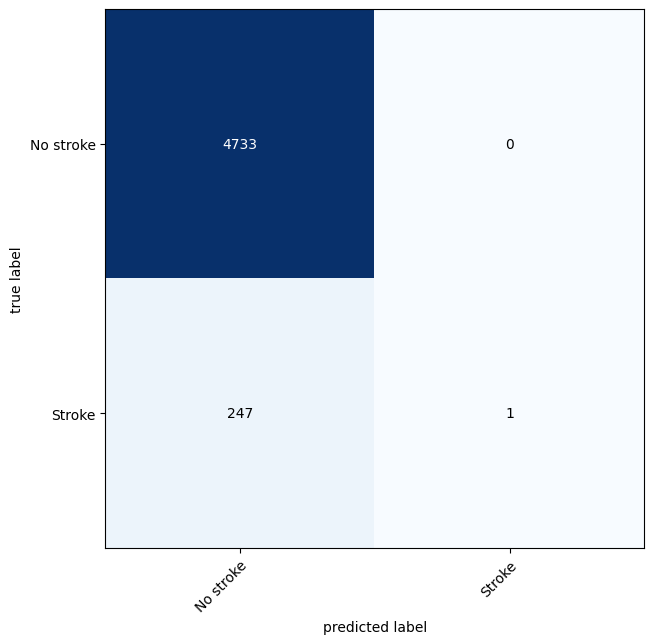

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

y_logit_tensor = linear_1(X.to(device))
y_pred_tensor = torch.round(torch.sigmoid(y_logit_tensor))

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=2, task='binary')
confmat_tensor = confmat(preds=y_pred_tensor.cpu().squeeze(),
                         target=y)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=['No stroke','Stroke'], # turn the row and column labels into class names
    figsize=(10, 7)
);

Dataset is highly inbalanced, only 248 stroke cases but 4733 non-stroke cases. Anomaly detection would be a better algorithm to make predictions instead of machine learning.

# Using neural networks for multi-class classification

## Weather prediction
Retrieved from https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

### Importing dataset, initial inspection and data wrangling

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/kevinchungus/Data-Science/main/Python/Datasets/weather_classification_data.csv')
data.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [ ]:
# Inspect datatypes of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
# No null entries, but have to one-hot encode object variables into numerical variables

# Define function to one-hot encode a categorical variable

def one_hot_encode(dataframe, column_name):
  dummy_df = pd.get_dummies(dataframe[column_name]).astype(int)
  dummy_colnames = list(dummy_df.columns.values)
  new_colnames = [column_name + '_' + x for x in dummy_colnames]
  print(dummy_colnames[0],new_colnames[0])
  rename_dict = {}
  for i in range(len(dummy_colnames)):
    rename_dict[dummy_colnames[i]] = new_colnames[i]
  dummy_df.rename(columns=rename_dict, inplace=True)
  dataframe.drop(column_name, axis=1, inplace=True)
  temp = dataframe.join(dummy_df)
  print(f'{column_name} one-hot encoded')
  return temp

# List of categorical columns to one-hot encode
cols_to_change = ['Cloud Cover', 'Season', 'Location']

# One-hot encoding process
for col in cols_to_change:
  data = one_hot_encode(data, col)

# Visualise datatypes again
data.info()

clear Cloud Cover_clear
Cloud Cover one-hot encoded
Autumn Season_Autumn
Season one-hot encoded
coastal Location_coastal
Location one-hot encoded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                13200 non-null  float64
 1   Humidity                   13200 non-null  int64  
 2   Wind Speed                 13200 non-null  float64
 3   Precipitation (%)          13200 non-null  float64
 4   Atmospheric Pressure       13200 non-null  float64
 5   UV Index                   13200 non-null  int64  
 6   Visibility (km)            13200 non-null  float64
 7   Weather Type               13200 non-null  object 
 8   Cloud Cover_clear          13200 non-null  int64  
 9   Cloud Cover_cloudy         13200 non-null  int64  
 10  Cloud Cover_overcast       13200 non-null  int64  
 11  Cloud Cover_

In [ ]:
# In predicting weather type, we check classes of weather type
class_names = sorted(list(data['Weather Type'].unique()))
print(class_names)

# Create a dictionary to convert weather type column into numerical labels, easier evaluation
class_dict = {'Cloudy':0, 'Rainy':1, 'Snowy':2, 'Sunny':3}

['Cloudy', 'Rainy', 'Snowy', 'Sunny']


In [ ]:
weather_num = []
for w in list(data['Weather Type']):
  weather_num.append(class_dict[w])

print(f'First 5 weather types are {list(data["Weather Type"])[:5]}\nFirst 5 weather labels are {weather_num[:5]}')

First 5 weather types are ['Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy']
First 5 weather labels are [1, 0, 3, 3, 1]


### Creating training and testing sets

In [ ]:
import torch

# Creating X and y variables, converting them to pytorch tensors
y = torch.Tensor(weather_num).type(torch.LongTensor)
X = torch.Tensor(data.drop(columns='Weather Type').values).type(torch.float32)
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: torch.Size([13200, 18])
Shape of y: torch.Size([13200])


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting X and y into training and testing parts, 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f'Number of entries in training set: {len(y_train)}')
print(f'Number of entries in testing set: {len(y_test)}\n')
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Number of entries in training set: 10560
Number of entries in testing set: 2640

Shape of X_train: torch.Size([10560, 18])
Shape of X_test: torch.Size([2640, 18])
Shape of y_train: torch.Size([10560])
Shape of y_test: torch.Size([2640])


### Building multi-class classification neural networks

In [ ]:
# Check pytorch version, number of CPUs and GPU (if available)
import torch
print(f'PyTorch version: {torch.__version__}')

import os
print(f'Number of CPUs: {os.cpu_count()}')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
  print(f'GPU available, currently using {torch.cuda.get_device_name()}')
else:
  print(f'No GPU available, currently using CPU')


PyTorch version: 2.3.1+cu121
Number of CPUs: 2
GPU available, currently using Tesla T4


### Multi-class linear classification model version

In [ ]:
# Simple neural network architecture with only linear elements
from torch import nn

class MultiLinearClassNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(in_features=18, out_features=10),
        nn.Linear(in_features=10, out_features=10),
        nn.Linear(in_features=10, out_features=4)   # 4 classes
    )

  def forward(self, x):
    return self.network(x)

linear_1 = MultiLinearClassNN().to(device)
linear_1

MultiLinearClassNN(
  (network): Sequential(
    (0): Linear(in_features=18, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [ ]:
# Check out parameters of linear model 1
linear_1.state_dict()

OrderedDict([('network.0.weight',
              tensor([[ 0.0856,  0.1871, -0.1017, -0.0674, -0.1333, -0.0797,  0.0141,  0.2038,
                        0.1709, -0.1419,  0.1235, -0.1719,  0.0069, -0.0976, -0.1310, -0.1265,
                        0.0471,  0.1662],
                      [ 0.0867, -0.0520, -0.0766, -0.0192,  0.1744,  0.0360, -0.1897, -0.1790,
                       -0.0579, -0.2170,  0.1579, -0.1258,  0.1759, -0.0923,  0.1859,  0.1784,
                        0.1188,  0.1788],
                      [-0.2075, -0.1490, -0.2329, -0.1206, -0.0146, -0.1379, -0.1132,  0.0717,
                        0.2257, -0.1773, -0.2003,  0.1940, -0.1212,  0.0729,  0.1202,  0.0026,
                        0.0549,  0.2182],
                      [-0.0582,  0.1546,  0.2164,  0.1106, -0.0654, -0.0173,  0.1198, -0.1424,
                       -0.0880,  0.1344,  0.0429,  0.1859,  0.0495,  0.1178, -0.1089,  0.1088,
                        0.0743, -0.1719],
                      [-0.1642,  0.011

In [ ]:
# Test 1 forward pass execution with first entry of X
trial = linear_1(X[0].to(device))
print(f'Class label: {torch.argmax(torch.softmax(trial,0),0).item()}')
print(f'Class name: {class_names[torch.argmax(torch.softmax(trial,0),0).item()]}')

Class label: 2
Class name: Snowy


In [ ]:
# Setup loss, optimizer and accuracy function

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(linear_1.parameters(), lr=0.1)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
# Define function for training and testing process for classification model

def train_step(model, X_train, y_train, loss_fn, optimizer, acc_fn):

  # Training mode
  model.train()

  # Send tensors to GPU
  X, y = X_train.to(device), y_train.to(device)

  # Forward pass
  y_logits = model(X).squeeze()
  y_preds = torch.argmax(torch.softmax(y_logits,1),1).type(torch.LongTensor).to(device)

  # Calculate accuracy
  acc = acc_fn(y_preds, y)

  # Calculate loss
  loss = loss_fn(y_logits, y)

  # Zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  return round(loss.item(),3), round(acc,2)

def test_step(model, X_test, y_test, loss_fn, acc_fn):

  # Evaluation mode
  model.eval()
  with torch.inference_mode():

    # Send tensors to GPU
    X, y = X_test.to(device), y_test.to(device)

    # Make predictions
    y_logits = model(X).squeeze()
    y_preds = torch.argmax(torch.softmax(y_logits,1),1).type(torch.LongTensor).to(device)

    # Calculate loss
    loss = loss_fn(y_logits, y)

    # Calculate accuracy
    acc = acc_fn(y_preds, y)

  return round(loss.item(),3), round(acc,2)

In [ ]:
# Define function to compile training and testing process, repeating for multiple epochs

from tqdm import tqdm
from timeit import default_timer

def train_test_loop(model, X_train, X_test, y_train, y_test, loss_fn, optimizer, acc_fn, epochs):

  # Keep track of training and testing losses
  train_loss = []
  train_acc = []
  test_loss = []
  test_acc = []

  # Time the duration required to train model
  start_time = default_timer()

  # Begin loop
  for epoch in tqdm(range(epochs)):
    curr_train_loss, curr_train_acc = train_step(model, X_train, y_train, loss_fn, optimizer, acc_fn)
    curr_test_loss, curr_test_acc = test_step(model, X_test, y_test, loss_fn, acc_fn)
    if epoch % 100 == 0:
      train_loss.append(curr_train_loss)
      train_acc.append(curr_train_acc)
      test_loss.append(curr_test_loss)
      test_acc.append(curr_test_acc)
      print(f'Epoch: {epoch} | Train loss: {curr_train_loss:.3f} | Train acc: {curr_train_acc:.3f}% | Test loss: {curr_test_loss:.3f} | Test acc: {curr_test_acc:.3f}%')

  # End time for training
  end_time = default_timer()
  print(f'\nTotal training time: {end_time - start_time:.3f} seconds')

  return train_loss, train_acc, test_loss, test_acc

In [ ]:
# Trial loop for 500 epochs
train_test_loop(linear_1, X_train, X_test, y_train, y_test, loss_fn, optimizer, acc_fn, 500)

  2%|▏         | 11/500 [00:00<00:04, 107.94it/s]

Epoch: 0 | Train loss: 64.010 | Train acc: 24.800% | Test loss: 60.059 | Test acc: 19.850%


 23%|██▎       | 115/500 [00:00<00:01, 285.84it/s]

Epoch: 100 | Train loss: 0.807 | Train acc: 84.430% | Test loss: 0.815 | Test acc: 81.550%


 49%|████▊     | 243/500 [00:00<00:00, 279.29it/s]

Epoch: 200 | Train loss: 0.553 | Train acc: 87.200% | Test loss: 0.573 | Test acc: 86.440%


 70%|███████   | 351/500 [00:01<00:00, 320.64it/s]

Epoch: 300 | Train loss: 0.506 | Train acc: 87.400% | Test loss: 0.528 | Test acc: 87.010%


 89%|████████▉ | 445/500 [00:01<00:00, 269.43it/s]

Epoch: 400 | Train loss: 0.509 | Train acc: 87.210% | Test loss: 0.530 | Test acc: 86.740%


100%|██████████| 500/500 [00:01<00:00, 277.51it/s]


Total training time: 1.810 seconds


([64.01, 0.807, 0.553, 0.506, 0.509],
 [24.8, 84.43, 87.2, 87.4, 87.21],
 [60.059, 0.815, 0.573, 0.528, 0.53],
 [19.85, 81.55, 86.44, 87.01, 86.74])

In [ ]:
# Test a prediction
import random

trial_ind = random.choice(range(len(y)))
linear_1.eval()
with torch.inference_mode():
    y_logit = linear_1(X[trial_ind].to(device))
    y_pred = torch.argmax(torch.softmax(y_logit,0),0).item()

y_true = class_names[y[trial_ind]]
y_pred = class_names[y_pred]

print(f'Prediction: {y_pred} | Actual: {y_true}')

Prediction: Sunny | Actual: Sunny


#### Confusion matrix to visualise model performance

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


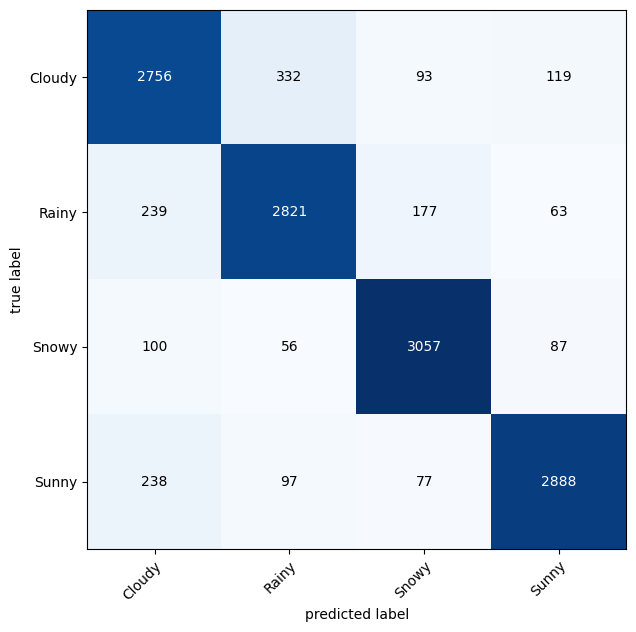

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

y_logit_tensor = linear_1(X.to(device))
y_pred_tensor = torch.argmax(torch.softmax(y_logit_tensor,1),1)

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=4, task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor.cpu().squeeze(),
                         target=y)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

### Multi-class non-linear classification model version

In [ ]:
# Simple neural network architecture with both linear and non-linear elements
from torch import nn

class MultiNonLinearClassNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(in_features=18, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=4)   # 4 classes
    )

  def forward(self, x):
    return self.network(x)

nonlinear_1 = MultiNonLinearClassNN().to(device)
nonlinear_1

MultiNonLinearClassNN(
  (network): Sequential(
    (0): Linear(in_features=18, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [ ]:
# Setup loss, optimizer and accuracy function

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nonlinear_1.parameters(), lr=0.0015)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
# Trial loop for 1000 epochs
train_test_loop(nonlinear_1, X_train, X_test, y_train, y_test, loss_fn, optimizer, acc_fn, 1000)

  6%|▌         | 58/1000 [00:00<00:03, 290.48it/s]

Epoch: 0 | Train loss: 25.298 | Train acc: 25.240% | Test loss: 23.866 | Test acc: 24.050%


 14%|█▍        | 138/1000 [00:00<00:03, 222.72it/s]

Epoch: 100 | Train loss: 1.146 | Train acc: 35.560% | Test loss: 1.150 | Test acc: 34.200%


 24%|██▍       | 240/1000 [00:01<00:03, 247.30it/s]

Epoch: 200 | Train loss: 0.938 | Train acc: 62.420% | Test loss: 0.948 | Test acc: 62.080%


 34%|███▍      | 343/1000 [00:01<00:02, 236.19it/s]

Epoch: 300 | Train loss: 0.814 | Train acc: 79.510% | Test loss: 0.823 | Test acc: 78.370%


 44%|████▍     | 442/1000 [00:01<00:02, 213.29it/s]

Epoch: 400 | Train loss: 0.718 | Train acc: 83.900% | Test loss: 0.728 | Test acc: 82.800%


 53%|█████▎    | 533/1000 [00:02<00:02, 215.29it/s]

Epoch: 500 | Train loss: 0.666 | Train acc: 85.270% | Test loss: 0.678 | Test acc: 84.320%


 63%|██████▎   | 626/1000 [00:02<00:01, 218.54it/s]

Epoch: 600 | Train loss: 0.638 | Train acc: 86.010% | Test loss: 0.651 | Test acc: 85.080%


 72%|███████▏  | 720/1000 [00:03<00:01, 206.84it/s]

Epoch: 700 | Train loss: 0.621 | Train acc: 86.350% | Test loss: 0.635 | Test acc: 85.340%


 81%|████████▏ | 814/1000 [00:03<00:00, 191.65it/s]

Epoch: 800 | Train loss: 0.608 | Train acc: 86.280% | Test loss: 0.623 | Test acc: 85.760%


 92%|█████████▏| 916/1000 [00:04<00:00, 131.73it/s]

Epoch: 900 | Train loss: 0.596 | Train acc: 86.380% | Test loss: 0.611 | Test acc: 86.330%


100%|██████████| 1000/1000 [00:04<00:00, 202.01it/s]


Total training time: 4.960 seconds


([25.298, 1.146, 0.938, 0.814, 0.718, 0.666, 0.638, 0.621, 0.608, 0.596],
 [25.24, 35.56, 62.42, 79.51, 83.9, 85.27, 86.01, 86.35, 86.28, 86.38],
 [23.866, 1.15, 0.948, 0.823, 0.728, 0.678, 0.651, 0.635, 0.623, 0.611],
 [24.05, 34.2, 62.08, 78.37, 82.8, 84.32, 85.08, 85.34, 85.76, 86.33])

In [ ]:
# Test a prediction
import random

trial_ind = random.choice(range(len(y)))
nonlinear_1.eval()
with torch.inference_mode():
    y_logit = nonlinear_1(X[trial_ind].to(device))
    y_pred = torch.argmax(torch.softmax(y_logit,0),0).item()

y_true = class_names[y[trial_ind]]
y_pred = class_names[y_pred]

print(f'Prediction: {y_pred} | Actual: {y_true}')

Prediction: Rainy | Actual: Rainy


#### Confusion matrix

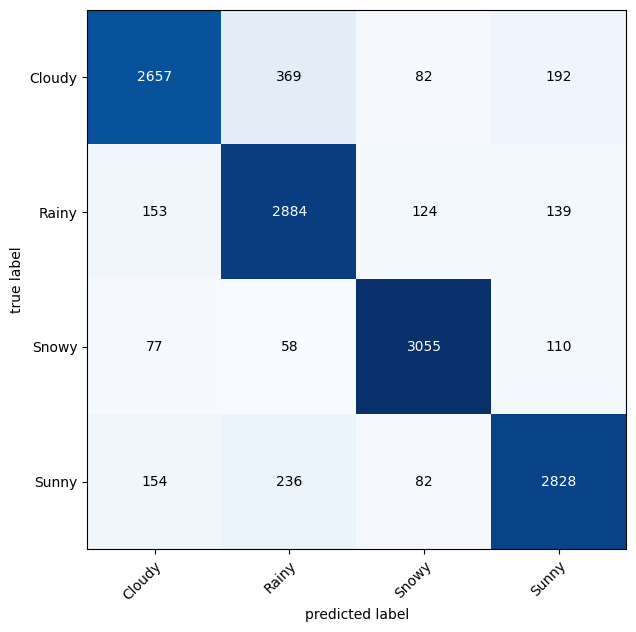

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

y_logit_tensor = nonlinear_1(X.to(device))
y_pred_tensor = torch.argmax(torch.softmax(y_logit_tensor,1),1)

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=4, task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor.cpu().squeeze(),
                         target=y)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

### Multi-class non-linear classification model version 2 (More complex)

In [ ]:
# Complex neural network architecture with both linear and non-linear elements
from torch import nn

class MultiNonLinearClassNN_V2(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(in_features=18, out_features=50),
        nn.ReLU(),
        nn.Sigmoid(),
        nn.Linear(in_features=50, out_features=20),
        nn.ReLU(),
        nn.Sigmoid(),
        nn.Linear(in_features=20, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=4)   # 4 classes
    )

  def forward(self, x):
    return self.network(x)

nonlinear_2 = MultiNonLinearClassNN_V2().to(device)
nonlinear_2

MultiNonLinearClassNN_V2(
  (network): Sequential(
    (0): Linear(in_features=18, out_features=50, bias=True)
    (1): ReLU()
    (2): Sigmoid()
    (3): Linear(in_features=50, out_features=20, bias=True)
    (4): ReLU()
    (5): Sigmoid()
    (6): Linear(in_features=20, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [ ]:
# Setup loss, optimizer and accuracy function

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nonlinear_2.parameters(), lr=0.0001)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
# Trial loop for 1000 epochs
train_test_loop(nonlinear_2, X_train, X_test, y_train, y_test, loss_fn, optimizer, acc_fn, 1000)

  3%|▎         | 30/1000 [00:00<00:06, 141.21it/s]

Epoch: 0 | Train loss: 1.406 | Train acc: 24.800% | Test loss: 1.401 | Test acc: 25.800%


 11%|█         | 109/1000 [00:00<00:04, 184.67it/s]

Epoch: 100 | Train loss: 1.394 | Train acc: 24.800% | Test loss: 1.390 | Test acc: 25.800%


 23%|██▎       | 230/1000 [00:01<00:04, 183.72it/s]

Epoch: 200 | Train loss: 1.389 | Train acc: 24.800% | Test loss: 1.387 | Test acc: 25.800%


 32%|███▏      | 320/1000 [00:01<00:04, 154.60it/s]

Epoch: 300 | Train loss: 1.387 | Train acc: 24.800% | Test loss: 1.386 | Test acc: 25.800%


 41%|████      | 408/1000 [00:03<00:08, 67.14it/s]

Epoch: 400 | Train loss: 1.386 | Train acc: 24.820% | Test loss: 1.386 | Test acc: 25.830%


 51%|█████     | 512/1000 [00:04<00:06, 71.74it/s]

Epoch: 500 | Train loss: 1.386 | Train acc: 25.240% | Test loss: 1.386 | Test acc: 24.050%


 62%|██████▏   | 615/1000 [00:05<00:03, 97.76it/s]

Epoch: 600 | Train loss: 1.386 | Train acc: 25.240% | Test loss: 1.386 | Test acc: 24.050%


 70%|███████   | 702/1000 [00:06<00:02, 115.70it/s]

Epoch: 700 | Train loss: 1.386 | Train acc: 25.240% | Test loss: 1.386 | Test acc: 24.050%


 83%|████████▎ | 832/1000 [00:07<00:01, 154.52it/s]

Epoch: 800 | Train loss: 1.386 | Train acc: 25.240% | Test loss: 1.386 | Test acc: 24.050%


 93%|█████████▎| 927/1000 [00:08<00:00, 186.44it/s]

Epoch: 900 | Train loss: 1.386 | Train acc: 25.240% | Test loss: 1.386 | Test acc: 24.050%


100%|██████████| 1000/1000 [00:08<00:00, 116.62it/s]


Total training time: 8.583 seconds


([1.406, 1.394, 1.389, 1.387, 1.386, 1.386, 1.386, 1.386, 1.386, 1.386],
 [24.8, 24.8, 24.8, 24.8, 24.82, 25.24, 25.24, 25.24, 25.24, 25.24],
 [1.401, 1.39, 1.387, 1.386, 1.386, 1.386, 1.386, 1.386, 1.386, 1.386],
 [25.8, 25.8, 25.8, 25.8, 25.83, 24.05, 24.05, 24.05, 24.05, 24.05])

In [ ]:
# Test a prediction
import random

trial_ind = random.choice(range(len(y)))
nonlinear_2.eval()
with torch.inference_mode():
    y_logit = nonlinear_2(X[trial_ind].to(device))
    y_pred = torch.argmax(torch.softmax(y_logit,0),0).item()

y_true = class_names[y[trial_ind]]
y_pred = class_names[y_pred]

print(f'Prediction: {y_pred} | Actual: {y_true}')

Prediction: Cloudy | Actual: Rainy


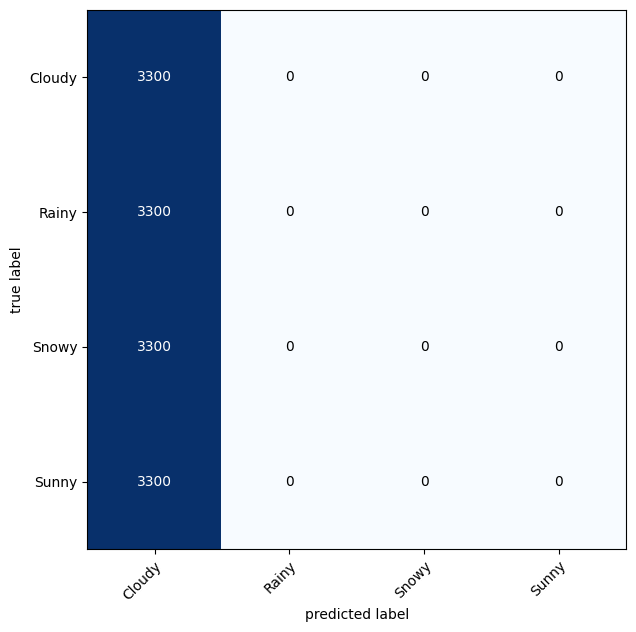

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

y_logit_tensor = nonlinear_2(X.to(device))
y_pred_tensor = torch.argmax(torch.softmax(y_logit_tensor,1),1)

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=4, task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor.cpu().squeeze(),
                         target=y)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

A model with too high a complexity may be worse off than a simpler model

# Using neural networks for computer vision and image classification

## Food 101 dataset


In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

PyTorch version: 2.3.1+cu121
torchvision version: 0.18.1+cu121


'cuda'

### Importing dataset, initial exploration of images

In [ ]:
# Setup training data and testing data

# Transform images all to same size of 64 by 64 and to tensors
data_transform = transforms.Compose([transforms.Resize(size=(64,64)), transforms.ToTensor()])

train_data = datasets.Food101(root='data', split='train', download=True,
                              transform=data_transform, target_transform=None)

test_data = datasets.Food101(root='data', split='test', download=True,
                             transform=data_transform, target_transform=None)

print(f'Training set has {len(train_data)} examples')
print(f'Testing set has {len(test_data)} examples')

Training set has 75750 examples
Testing set has 25250 examples


In [ ]:
# See classes
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# Subset training and testing set for faster training process
from torch.utils.data import Subset

rand_train_inds = random.sample(range(75750), 1000)
train_data = Subset(train_data, rand_train_inds)

rand_test_inds = random.sample(range(25250), 250)
test_data = Subset(test_data, rand_test_inds)

print('After subsetting:')
print(f'Training set has {len(train_data)} examples')
print(f'Testing set has {len(test_data)} examples')

After subsetting:
Training set has 1000 examples
Testing set has 250 examples


In [ ]:
# See first training sample
img, label = train_data[0]
print(f'Image encoded as tensor: \n{img} \nImage label: {label}')
print(f'Image size: {img.shape}')

Image encoded as tensor: 
tensor([[[0.2431, 0.2549, 0.2667,  ..., 0.1804, 0.1529, 0.1255],
         [0.2549, 0.2627, 0.2745,  ..., 0.1961, 0.1686, 0.1412],
         [0.2627, 0.2706, 0.2863,  ..., 0.2078, 0.1882, 0.1569],
         ...,
         [0.5294, 0.5412, 0.5961,  ..., 0.4078, 0.3804, 0.3647],
         [0.4824, 0.5098, 0.5882,  ..., 0.3961, 0.3647, 0.3529],
         [0.4549, 0.5059, 0.5843,  ..., 0.3882, 0.3608, 0.3451]],

        [[0.2471, 0.2588, 0.2706,  ..., 0.1843, 0.1647, 0.1451],
         [0.2627, 0.2667, 0.2784,  ..., 0.2000, 0.1765, 0.1608],
         [0.2706, 0.2784, 0.2902,  ..., 0.2118, 0.1961, 0.1725],
         ...,
         [0.3686, 0.4549, 0.5765,  ..., 0.4157, 0.3961, 0.3843],
         [0.3529, 0.4510, 0.5804,  ..., 0.4039, 0.3804, 0.3765],
         [0.3333, 0.4588, 0.5804,  ..., 0.3961, 0.3765, 0.3686]],

        [[0.2471, 0.2667, 0.2784,  ..., 0.1882, 0.1608, 0.1412],
         [0.2588, 0.2745, 0.2863,  ..., 0.2078, 0.1804, 0.1608],
         [0.2706, 0.2824, 0.2980

Image shape: torch.Size([3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

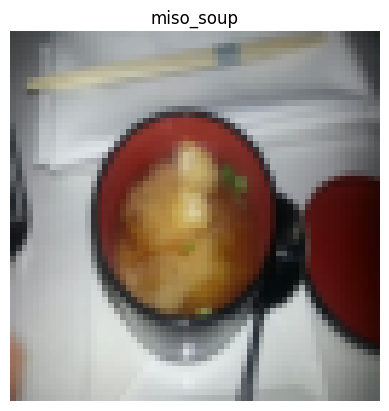

In [ ]:
# Visualise first image in training set
img, label = train_data[0]
print(f"Image shape: {img.shape}")
plt.imshow(img.permute(1,2,0)) # matplotlib uses (height, width, colour channel)
plt.title(class_names[label])
plt.axis(False)

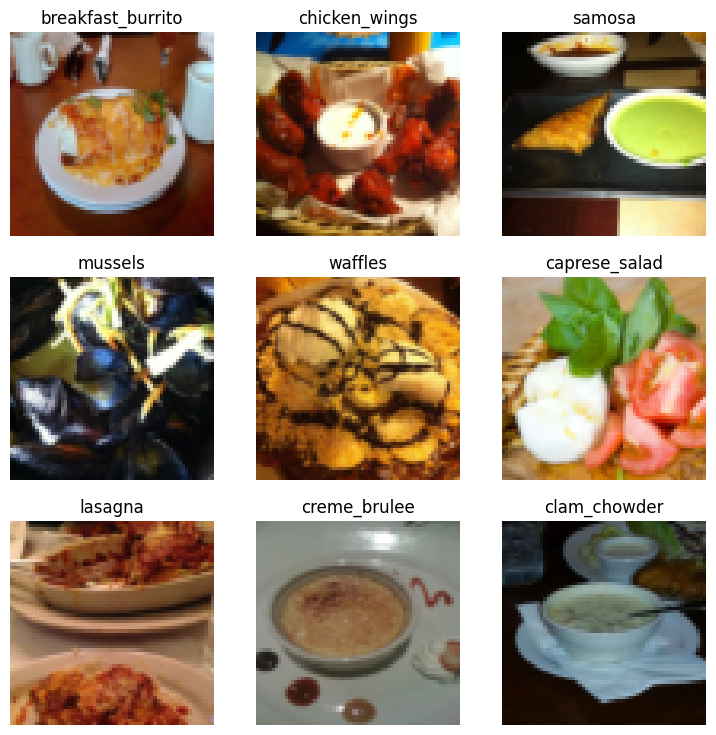

In [ ]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1,2,0))
    plt.title(class_names[label])
    plt.axis(False);

### Prepare dataloader for training and testing sets

In [ ]:
from torch.utils.data import DataLoader

# Turn datasets into dataloader (batch size = 32)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of 32")
print(f"Length of test dataloader: {len(test_dataloader)} batches of 32")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ae3baa3aaa0>, <torch.utils.data.dataloader.DataLoader object at 0x7ae3b95fd1e0>)
Length of train dataloader: 32 batches of 32
Length of test dataloader: 8 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

Image size: torch.Size([3, 64, 64])
Label: 18


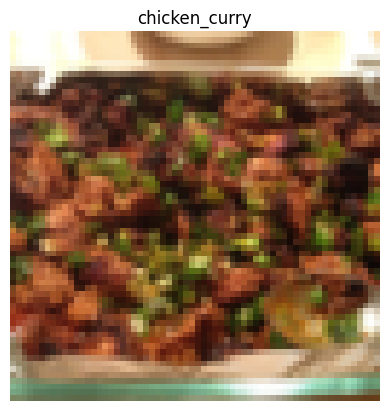

In [ ]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}")

### Building simple image classifier model with only linear elements

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Try uncommenting below and see what happens
print(x)
print(output)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

tensor([[[0.2706, 0.1451, 0.1490,  ..., 0.5922, 0.5804, 0.5569],
         [0.6118, 0.3059, 0.1882,  ..., 0.5490, 0.4627, 0.4039],
         [0.7176, 0.6275, 0.3412,  ..., 0.6235, 0.4314, 0.4392],
         ...,
         [0.0745, 0.0667, 0.0627,  ..., 0.4196, 0.3765, 0.4392],
         [0.0824, 0.0706, 0.0627,  ..., 0.3255, 0.1412, 0.2549],
         [0.0824, 0.0706, 0.0588,  ..., 0.1529, 0.0902, 0.1137]],

        [[0.4667, 0.3725, 0.3804,  ..., 0.7569, 0.7216, 0.6745],
         [0.7059, 0.4980, 0.4314,  ..., 0.6980, 0.5765, 0.4863],
         [0.7725, 0.7333, 0.5216,  ..., 0.7725, 0.5529, 0.5176],
         ...,
         [0.1608, 0.1451, 0.1294,  ..., 0.3922, 0.3569, 0.4039],
         [0.1529, 0.1451, 0.1255,  ..., 0.3137, 0.1569, 0.2471],
         [0.1529, 0.1529, 0.1294,  ..., 0.1686, 0.1176, 0.1294]],

        [[0.4941, 0.4039, 0.4078,  ..., 0.8588, 0.7922, 0.7451],
         [0.7255, 0.5255, 0.4549,  ..., 0.7804, 0.6549, 0.5569],
         [0.7647, 0.7451, 0.5373,  ..., 0.8431, 0.6275, 0.

In [ ]:
# Simple neural network with flatten and linear elements

from torch import nn

class Food101_V1(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*64*3, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=len(class_names))
        )

    def forward(self, x):
        return self.layer_stack(x)

food_1 = Food101_V1(hidden_units=10).to(device)
food_1

Food101_V1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=101, bias=True)
  )
)

In [ ]:
# Setup loss and acc function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=food_1.parameters(), lr=0.005)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
def train_step(model, dataloader, loss_fn, optimizer, acc_fn):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_logits = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_logits, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
        train_acc += acc_fn(y_preds, y)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return round(train_loss,3), round(train_acc,3)

In [ ]:
def test_step(model, dataloader, loss_fn, acc_fn):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(y_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            test_acc += acc_fn(y_preds, y)

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return round(test_loss,3), round(test_acc,3)

In [ ]:
from tqdm import tqdm

def train_test_loop(model, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, epochs):

    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, acc_fn)
        test_loss, test_acc = test_step(model, test_dataloader, loss_fn, acc_fn)
        if epoch % 10 == 0:
          print(f'Epoch: {epoch} | Train loss: {train_loss} | Train acc: {train_acc} | Test loss: {test_loss} | Test acc: {test_acc}')

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Trial loop for 50 epoch
food_1_results = train_test_loop(food_1, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, 50)

  2%|▏         | 1/50 [00:04<03:51,  4.73s/it]

Epoch: 0 | Train loss: 12.833 | Train acc: 0.781 | Test loss: 5.968 | Test acc: 0.781


 22%|██▏       | 11/50 [00:42<02:28,  3.82s/it]

Epoch: 10 | Train loss: 3.705 | Train acc: 15.039 | Test loss: 5.486 | Test acc: 1.172


 42%|████▏     | 21/50 [01:25<02:14,  4.64s/it]

Epoch: 20 | Train loss: 2.983 | Train acc: 27.051 | Test loss: 6.898 | Test acc: 3.906


 62%|██████▏   | 31/50 [02:11<01:18,  4.11s/it]

Epoch: 30 | Train loss: 1.975 | Train acc: 46.191 | Test loss: 8.076 | Test acc: 1.953


 82%|████████▏ | 41/50 [02:49<00:34,  3.80s/it]

Epoch: 40 | Train loss: 1.873 | Train acc: 47.656 | Test loss: 9.867 | Test acc: 2.043


100%|██████████| 50/50 [03:25<00:00,  4.12s/it]


#### Loss and accuracy curves

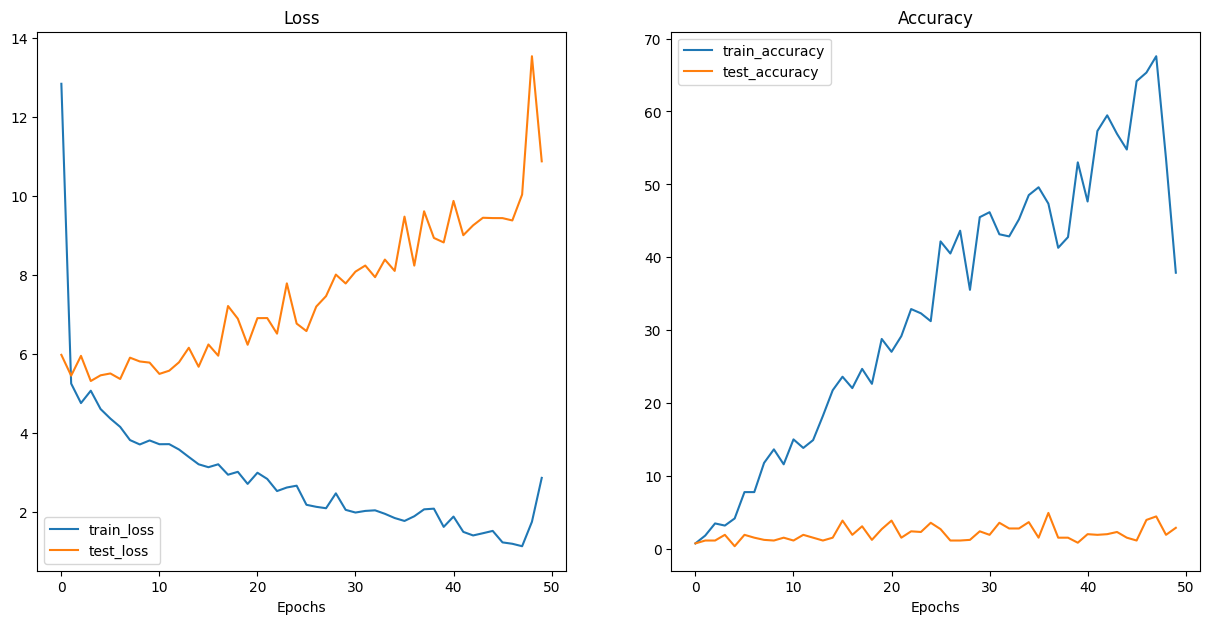

In [ ]:
def plot_loss_curves(results):
    train_loss = results['train_loss']
    test_loss = results['test_loss']
    train_acc = results['train_acc']
    test_acc = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='train_accuracy')
    plt.plot(epochs, test_acc, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

plot_loss_curves(food_1_results)

### Building convolutional neural network to classify images

In [ ]:
# TinyVGG architecture from https://poloclub.github.io/cnn-explainer/
class TinyVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*16*16, out_features=len(class_names))
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

food_2 = TinyVGG().to(device)
food_2

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=101, bias=True)
  )
)

In [ ]:
# Setup loss and acc function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=food_1.parameters(), lr=0.005)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
# Trial loop for 50 epochs
food_2_results = train_test_loop(food_1, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, 50)

  2%|▏         | 1/50 [00:04<04:02,  4.94s/it]

Epoch: 0 | Train loss: 5.873 | Train acc: 29.102 | Test loss: 11.101 | Test acc: 1.562


 22%|██▏       | 11/50 [00:49<02:34,  3.95s/it]

Epoch: 10 | Train loss: 1.222 | Train acc: 60.938 | Test loss: 11.527 | Test acc: 2.734


 42%|████▏     | 21/50 [01:30<01:57,  4.05s/it]

Epoch: 20 | Train loss: 0.494 | Train acc: 87.207 | Test loss: 12.701 | Test acc: 2.825


 62%|██████▏   | 31/50 [02:09<01:15,  3.99s/it]

Epoch: 30 | Train loss: 0.302 | Train acc: 92.578 | Test loss: 12.985 | Test acc: 1.172


 82%|████████▏ | 41/50 [02:50<00:37,  4.21s/it]

Epoch: 40 | Train loss: 0.181 | Train acc: 96.875 | Test loss: 13.478 | Test acc: 1.653


100%|██████████| 50/50 [03:25<00:00,  4.10s/it]


#### Loss and accuracy curves

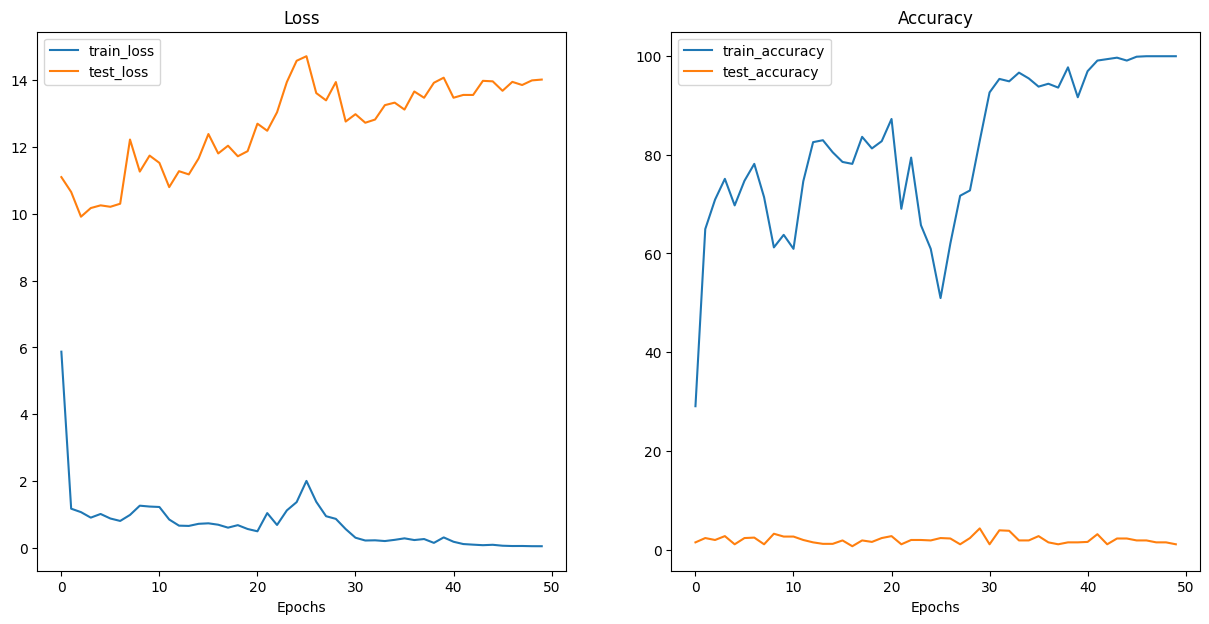

In [ ]:
plot_loss_curves(food_2_results)

Extremely overfitting

## COVID dataset
Retrieved from https://www.kaggle.com/datasets/plameneduardo/sarscov2-ctscan-dataset?select=non-COVID

In [ ]:
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Importing dataset, initial exploration of images

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "COVID"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "COVID.zip", "wb") as f:
        request = requests.get("https://github.com/kevinchungus/Data-Science/raw/main/Python/Datasets/COVID.zip")
        print("Downloading COVID data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "COVID.zip", "r") as zip_ref:
        print("Unzipping COVID data...")
        zip_ref.extractall(image_path)

Did not find data/COVID directory, creating one...
Unzipping COVID data...


In [ ]:
# Check directories in the image path
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/COVID'.
There are 2 directories and 1 images in 'data/COVID/COVID'.
There are 2 directories and 1 images in 'data/COVID/COVID/Test'.
There are 0 directories and 51 images in 'data/COVID/COVID/Test/negative'.
There are 0 directories and 51 images in 'data/COVID/COVID/Test/positive'.
There are 2 directories and 1 images in 'data/COVID/COVID/Train'.
There are 0 directories and 151 images in 'data/COVID/COVID/Train/negative'.
There are 0 directories and 151 images in 'data/COVID/COVID/Train/positive'.
There are 1 directories and 0 images in 'data/COVID/__MACOSX'.
There are 2 directories and 1 images in 'data/COVID/__MACOSX/COVID'.
There are 2 directories and 1 images in 'data/COVID/__MACOSX/COVID/Test'.
There are 0 directories and 51 images in 'data/COVID/__MACOSX/COVID/Test/negative'.
There are 0 directories and 51 images in 'data/COVID/__MACOSX/COVID/Test/positive'.
There are 2 directories and 1 images in 'data/COVID/__MACOSX/COVID/Train'.
Th

There are 400 images
Random image path: data/COVID/COVID/Train/negative/Non-Covid (350).png
Image class: negative
Image height: 255
Image width: 307


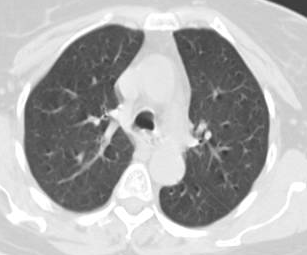

In [ ]:
# Visualise a random image
import random
from PIL import Image

all_image_paths = list(image_path.glob("*/*/*/*.png"))
print(f'There are {len(all_image_paths)} images')

random_image_path = random.choice(all_image_paths)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

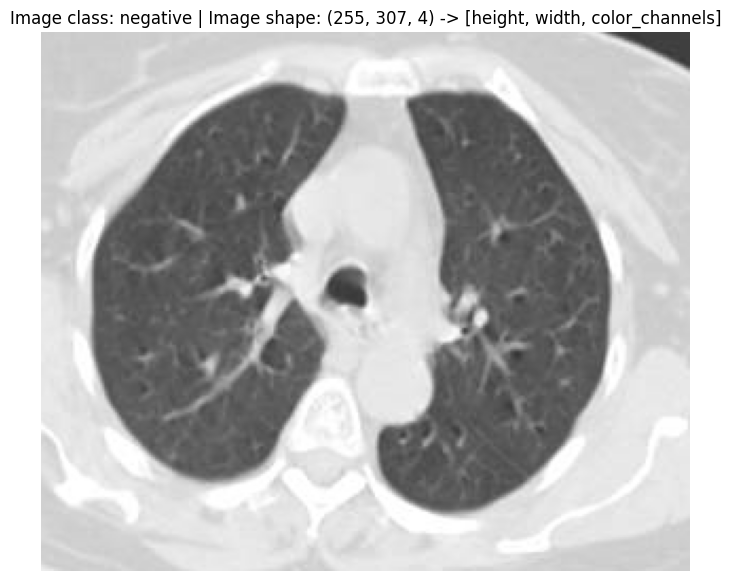

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

### Preparing dataloader for training and testing sets

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

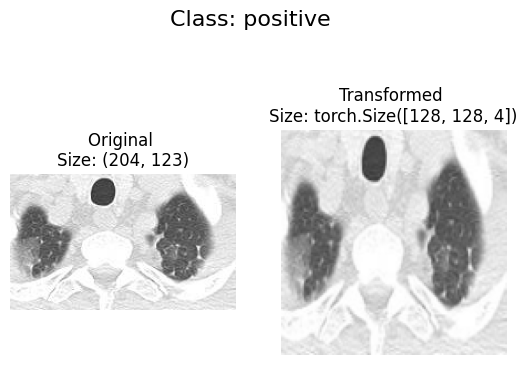

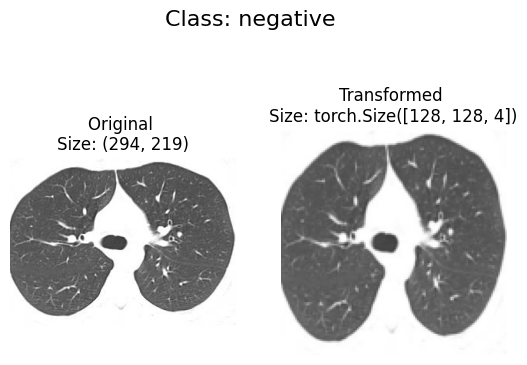

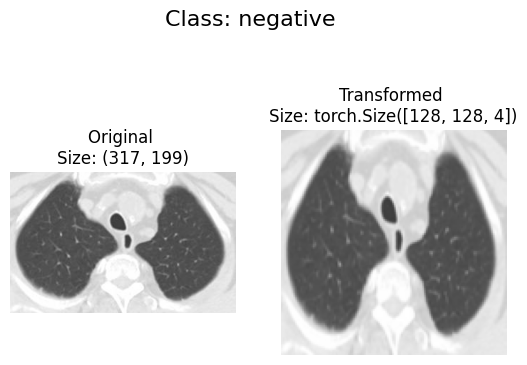

In [ ]:
# Create transform
data_transform = transforms.Compose([transforms.Resize(size=(128,128)), transforms.ToTensor()])

# Test out transform by plotting original and transformed images
def plot_transformed_images(image_paths, transform, n):
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(all_image_paths, data_transform, 3)

In [ ]:
# Setup train and testing paths
train_dir = image_path / "COVID/Train"
test_dir = image_path / "COVID/Test"

train_dir, test_dir

(PosixPath('data/COVID/COVID/Train'), PosixPath('data/COVID/COVID/Test'))

In [ ]:
# Use ImageFolder to create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)

test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 300
    Root location: data/COVID/COVID/Train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 100
    Root location: data/COVID/COVID/Test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [ ]:
# Get class names as a list
class_names = train_data.classes
print(class_names)

# Get class names as a dict
class_dict = train_data.class_to_idx
print(class_dict)

['negative', 'positive']
{'negative': 0, 'positive': 1}


In [ ]:
# Visualise first training example as tensor
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.8314, 0.8118, 0.8588,  ..., 0.8627, 0.8353, 0.8235],
         [0.8235, 0.8353, 0.8784,  ..., 0.8824, 0.8510, 0.8235],
         [0.8235, 0.8667, 0.8980,  ..., 0.8941, 0.8627, 0.8235],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 0.9961],
         [0.9608, 0.9882, 0.9961,  ..., 0.9961, 0.9804, 0.9529],
         [0.9412, 0.9569, 0.9765,  ..., 0.9647, 0.9333, 0.9137]],

        [[0.8314, 0.8118, 0.8588,  ..., 0.8627, 0.8353, 0.8235],
         [0.8235, 0.8353, 0.8784,  ..., 0.8824, 0.8510, 0.8235],
         [0.8235, 0.8667, 0.8980,  ..., 0.8941, 0.8627, 0.8235],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 0.9961],
         [0.9608, 0.9882, 0.9961,  ..., 0.9961, 0.9804, 0.9529],
         [0.9412, 0.9569, 0.9765,  ..., 0.9647, 0.9333, 0.9137]],

        [[0.8314, 0.8118, 0.8588,  ..., 0.8627, 0.8353, 0.8235],
         [0.8235, 0.8353, 0.8784,  ..., 0.8824, 0.8510, 0.8235],
         [0.8235, 0.8667, 0.8980,  ..., 0.89

Original shape: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute shape: torch.Size([128, 128, 3]) -> [height, width, color_channels]


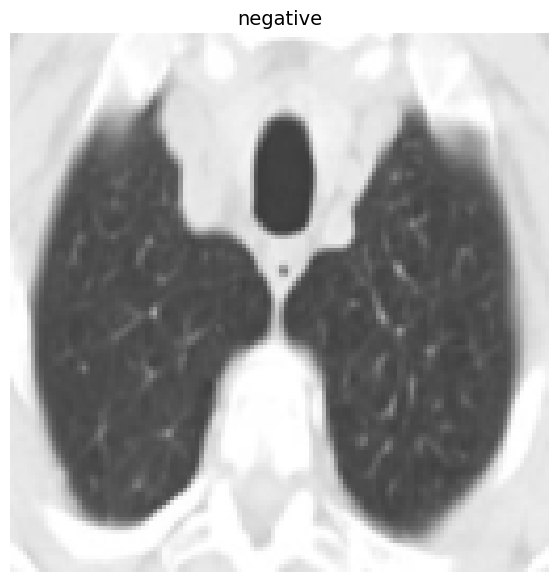

In [ ]:
# First training example as image
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [ ]:
# Turn train and test datasets into dataloaders
from torch.utils.data import DataLoader
import os

num_cpus = os.cpu_count()
print(f'Number of CPUs available: {num_cpus}')

train_dataloader = DataLoader(dataset=train_data, batch_size=32, num_workers=num_cpus, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=32, num_workers=num_cpus, shuffle=False)

train_dataloader, test_dataloader

Number of CPUs available: 2


(<torch.utils.data.dataloader.DataLoader at 0x782adb063bb0>,
 <torch.utils.data.dataloader.DataLoader at 0x782af51d52d0>)

In [ ]:
# Test out dataloader
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


### Simple image classifier with only linear elements

In [ ]:
# Simple neural network with flatten and linear elements

from torch import nn

class CovidNN_V1(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=128*128*3, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=len(class_names))
        )

    def forward(self, x):
        return self.layer_stack(x)

covid_1 = CovidNN_V1(hidden_units=10).to(device)
covid_1

CovidNN_V1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=49152, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=2, bias=True)
  )
)

In [ ]:
# Setup loss and acc function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=covid_1.parameters(), lr=0.005)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
def train_step(model, dataloader, loss_fn, optimizer, acc_fn):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_logits = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_logits, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
        train_acc += acc_fn(y_preds, y)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return round(train_loss,3), round(train_acc,3)

In [ ]:
def test_step(model, dataloader, loss_fn, acc_fn):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(y_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            test_acc += acc_fn(y_preds, y)

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return round(test_loss,3), round(test_acc,3)

In [ ]:
from tqdm import tqdm

def train_test_loop(model, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, epochs):

    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, acc_fn)
        test_loss, test_acc = test_step(model, test_dataloader, loss_fn, acc_fn)
        if epoch % 10 == 0:
          print(f'Epoch: {epoch} | Train loss: {train_loss} | Train acc: {train_acc} | Test loss: {test_loss} | Test acc: {test_acc}')

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Trial loop for 50 epoch
covid_1_results = train_test_loop(covid_1, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, 50)

  2%|▏         | 1/50 [00:01<01:24,  1.73s/it]

Epoch: 0 | Train loss: 31.509 | Train acc: 46.875 | Test loss: 7.544 | Test acc: 39.062


 22%|██▏       | 11/50 [00:15<00:48,  1.26s/it]

Epoch: 10 | Train loss: 0.458 | Train acc: 75.417 | Test loss: 0.55 | Test acc: 70.312


 42%|████▏     | 21/50 [00:28<00:36,  1.24s/it]

Epoch: 20 | Train loss: 0.381 | Train acc: 86.042 | Test loss: 0.534 | Test acc: 69.531


 62%|██████▏   | 31/50 [00:41<00:23,  1.24s/it]

Epoch: 30 | Train loss: 0.303 | Train acc: 88.229 | Test loss: 0.523 | Test acc: 71.875


 82%|████████▏ | 41/50 [00:54<00:11,  1.24s/it]

Epoch: 40 | Train loss: 0.373 | Train acc: 83.333 | Test loss: 0.578 | Test acc: 71.875


100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


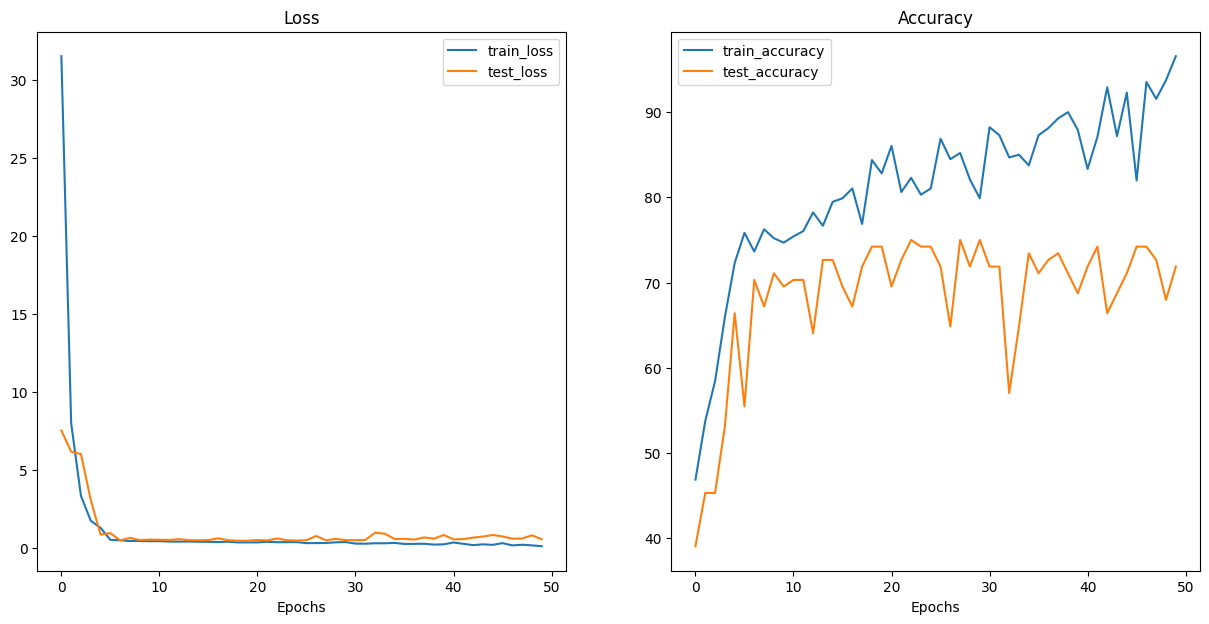

In [ ]:
def plot_loss_curves(results):
    train_loss = results['train_loss']
    test_loss = results['test_loss']
    train_acc = results['train_acc']
    test_acc = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='train_accuracy')
    plt.plot(epochs, test_acc, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

plot_loss_curves(covid_1_results)

Overfitting can be seen, test accuracy not doing well

### Convolutional neural network to classify images

In [ ]:
class CovidNN_V2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*64*64, out_features=len(class_names))
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        return x

covid_2 = CovidNN_V2().to(device)
covid_2

CovidNN_V2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=40960, out_features=2, bias=True)
  )
)

In [ ]:
# Setup loss and acc function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=covid_2.parameters(), lr=0.001)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
# Trial loop for 50 epoch
covid_2_results = train_test_loop(covid_2, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, 50)

  2%|▏         | 1/50 [00:01<01:03,  1.29s/it]

Epoch: 0 | Train loss: 0.66 | Train acc: 62.083 | Test loss: 0.823 | Test acc: 53.125


 22%|██▏       | 11/50 [00:15<00:55,  1.43s/it]

Epoch: 10 | Train loss: 0.181 | Train acc: 92.5 | Test loss: 0.84 | Test acc: 70.312


 42%|████▏     | 21/50 [00:29<00:40,  1.38s/it]

Epoch: 20 | Train loss: 0.062 | Train acc: 99.062 | Test loss: 0.95 | Test acc: 64.844


 62%|██████▏   | 31/50 [00:43<00:25,  1.37s/it]

Epoch: 30 | Train loss: 0.009 | Train acc: 100.0 | Test loss: 0.801 | Test acc: 74.219


 82%|████████▏ | 41/50 [00:57<00:11,  1.33s/it]

Epoch: 40 | Train loss: 0.004 | Train acc: 100.0 | Test loss: 0.925 | Test acc: 73.438


100%|██████████| 50/50 [01:10<00:00,  1.40s/it]


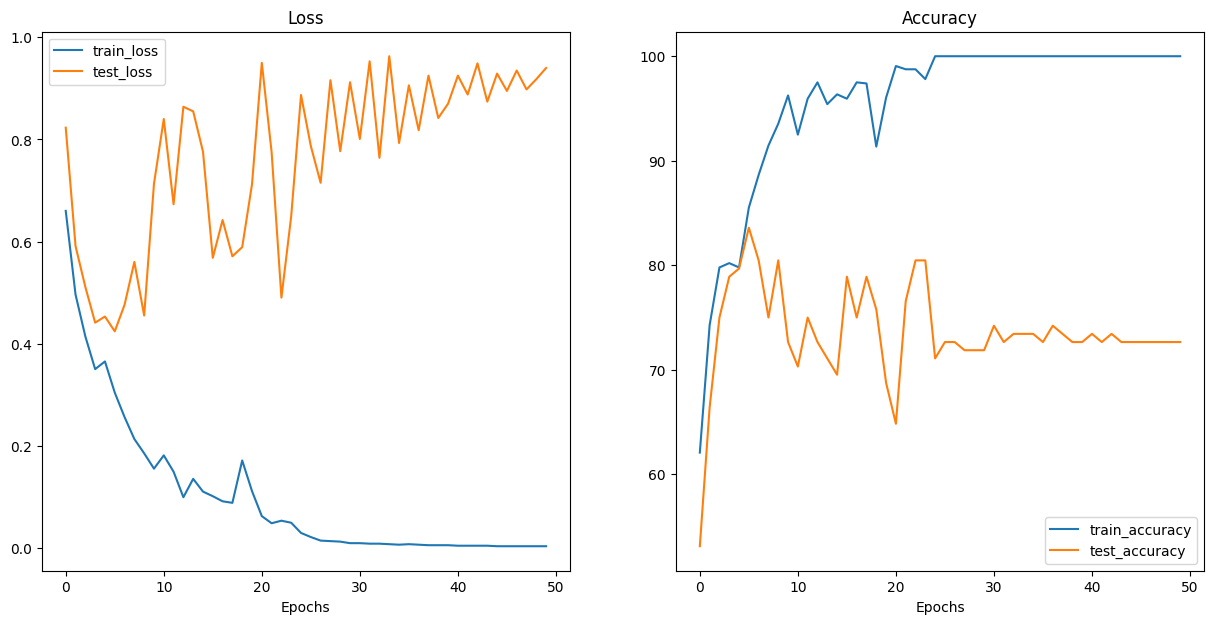

In [ ]:
plot_loss_curves(covid_2_results)

Higher complexity model, does very well on training set but worse case of overfitting

### Very simple image classifier

In [ ]:
# Very simple neural network with flatten and linear elements

from torch import nn

class CovidNN_V3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=128*128*3, out_features=len(class_names)),
        )

    def forward(self, x):
        return self.layer_stack(x)

covid_3 = CovidNN_V3().to(device)
covid_3

CovidNN_V3(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=49152, out_features=2, bias=True)
  )
)

In [ ]:
# Setup loss and acc function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=covid_3.parameters(), lr=0.0005)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
# Trial loop for 50 epoch
covid_3_results = train_test_loop(covid_3, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, 50)

  2%|▏         | 1/50 [00:01<01:03,  1.29s/it]

Epoch: 0 | Train loss: 7.56 | Train acc: 51.354 | Test loss: 15.288 | Test acc: 39.062


 22%|██▏       | 11/50 [00:15<00:52,  1.35s/it]

Epoch: 10 | Train loss: 0.367 | Train acc: 85.521 | Test loss: 1.419 | Test acc: 55.469


 42%|████▏     | 21/50 [00:30<00:45,  1.58s/it]

Epoch: 20 | Train loss: 0.217 | Train acc: 90.833 | Test loss: 0.66 | Test acc: 74.219


 62%|██████▏   | 31/50 [00:44<00:29,  1.57s/it]

Epoch: 30 | Train loss: 0.193 | Train acc: 91.979 | Test loss: 0.749 | Test acc: 68.75


 82%|████████▏ | 41/50 [00:58<00:13,  1.51s/it]

Epoch: 40 | Train loss: 0.09 | Train acc: 97.812 | Test loss: 0.83 | Test acc: 60.156


100%|██████████| 50/50 [01:10<00:00,  1.42s/it]


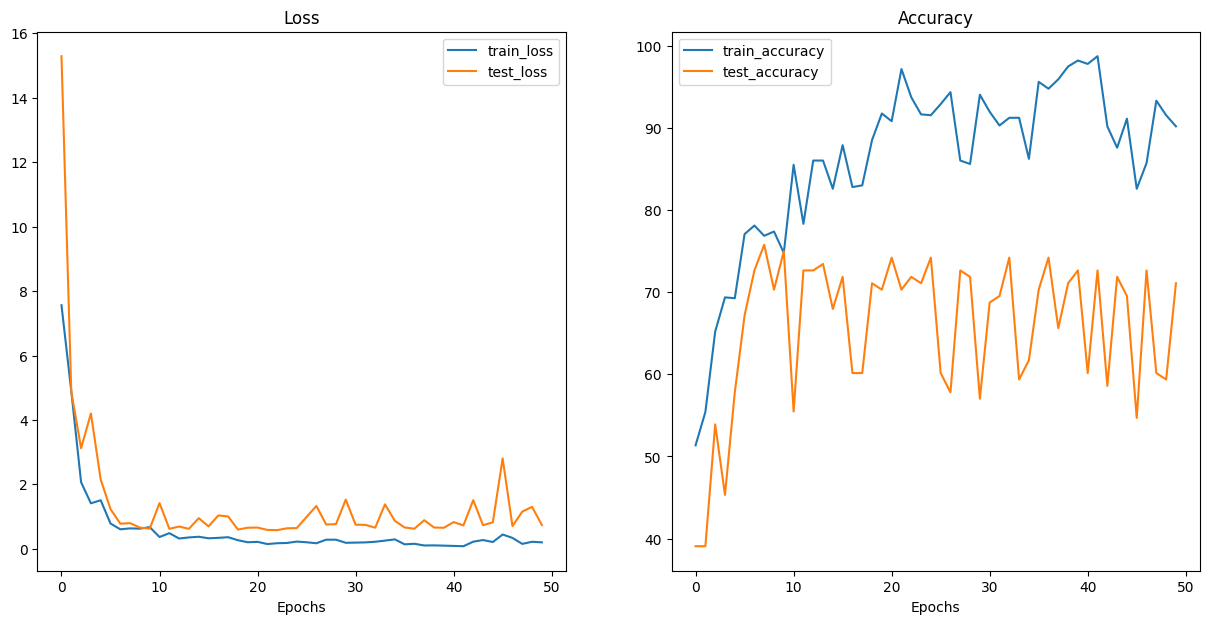

In [ ]:
plot_loss_curves(covid_3_results)

Still overfitting

## Vegetables dataset
Retrieved from https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset?select=Vegetable+Images

In [1]:
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Import dataset from google drive, initial exploration of images

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import requests
import zipfile
from pathlib import Path

data_path = Path('/content/drive/MyDrive/data/Vegetables')
image_path = data_path / 'Vegetable Images'

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f'Unzipping Vegetables.zip into {image_path}')
    zip_ref = zipfile.ZipFile(data_path / "Vegetables.zip", 'r')
    zip_ref.extractall(data_path)
    zip_ref.close()

Unzipping Vegetables.zip into /content/drive/MyDrive/data/Vegetables/Vegetable Images


In [7]:
# Check directories in the image path
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 1 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images'.
There are 15 directories and 1 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images/test'.
There are 0 directories and 200 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images/test/Capsicum'.
There are 0 directories and 200 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images/test/Radish'.
There are 0 directories and 200 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images/test/Pumpkin'.
There are 0 directories and 200 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images/test/Cauliflower'.
There are 0 directories and 200 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images/test/Potato'.
There are 0 directories and 200 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images/test/Bean'.
There are 0 directories and 200 images in '/content/drive/MyDrive/data/Vegetables/Vegetable Images/test/Cucumber

There are 17999 images
Random image path: /content/drive/MyDrive/data/Vegetables/Vegetable Images/train/Bottle_Gourd/0570.jpg
Image class: Bottle_Gourd
Image height: 224
Image width: 224


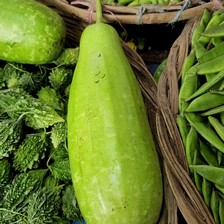

In [8]:
# Visualise a random image
import random
from PIL import Image

all_image_paths = list(image_path.glob("*/*/*.jpg"))
print(f'There are {len(all_image_paths)} images')

random_image_path = random.choice(all_image_paths)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

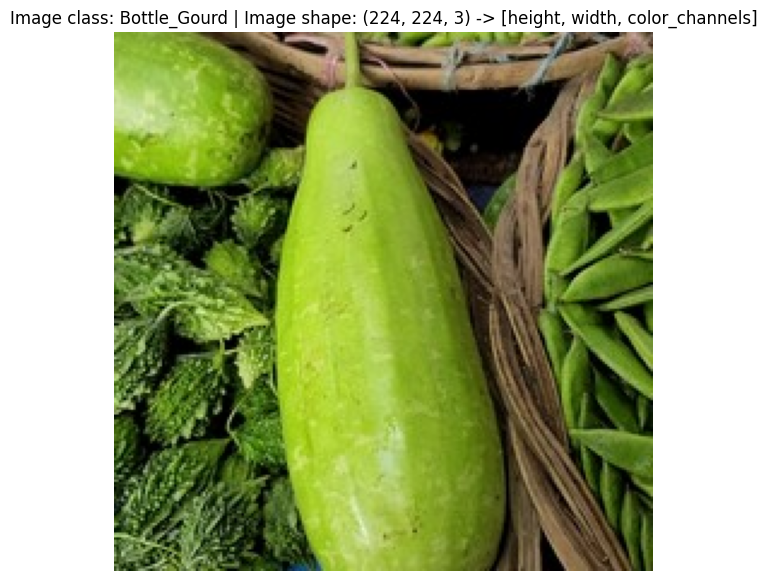

In [9]:
# Visualise using matplotlib
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

### Prepare datasets and dataloaders

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

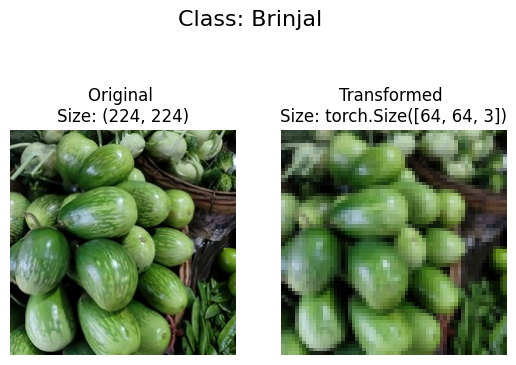

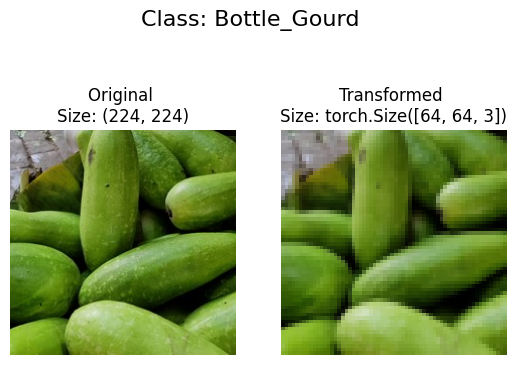

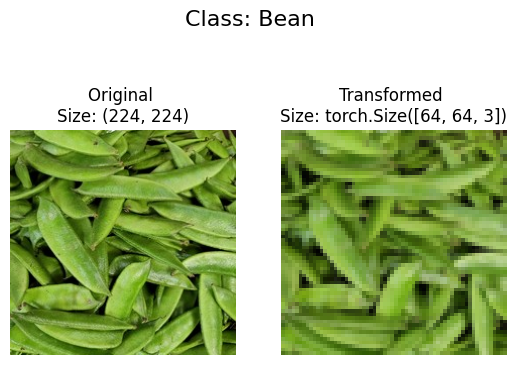

In [11]:
# Create transform
data_transform = transforms.Compose([transforms.Resize(size=(64,64)), transforms.ToTensor()])

# Test out transform by plotting original and transformed images
def plot_transformed_images(image_paths, transform, n):
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(all_image_paths, data_transform, 3)

In [12]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('/content/drive/MyDrive/data/Vegetables/Vegetable Images/train'),
 PosixPath('/content/drive/MyDrive/data/Vegetables/Vegetable Images/test'))

In [13]:
# Use ImageFolder to create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)

test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 15000
    Root location: /content/drive/MyDrive/data/Vegetables/Vegetable Images/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2999
    Root location: /content/drive/MyDrive/data/Vegetables/Vegetable Images/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [14]:
# Get class names as a list
class_names = train_data.classes
print(class_names)

# Get class names as a dict
class_dict = train_data.class_to_idx
print(class_dict)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


In [15]:
# Visualise first training example as tensor
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.7255, 0.7294, 0.7294,  ..., 0.7529, 0.7490, 0.7529],
         [0.7294, 0.7333, 0.7333,  ..., 0.7569, 0.7569, 0.7529],
         [0.7294, 0.7333, 0.7373,  ..., 0.7569, 0.7569, 0.7569],
         ...,
         [0.6784, 0.6784, 0.6784,  ..., 0.7059, 0.7059, 0.7059],
         [0.6784, 0.6784, 0.6745,  ..., 0.6980, 0.6980, 0.6980],
         [0.6745, 0.6745, 0.6745,  ..., 0.6902, 0.6902, 0.6902]],

        [[0.7137, 0.7176, 0.7216,  ..., 0.7529, 0.7490, 0.7529],
         [0.7176, 0.7216, 0.7255,  ..., 0.7569, 0.7569, 0.7529],
         [0.7176, 0.7216, 0.7255,  ..., 0.7608, 0.7608, 0.7608],
         ...,
         [0.6510, 0.6510, 0.6510,  ..., 0.7059, 0.7098, 0.7059],
         [0.6431, 0.6431, 0.6431,  ..., 0.6941, 0.6941, 0.6980],
         [0.6392, 0.6392, 0.6392,  ..., 0.6863, 0.6863, 0.6863]],

        [[0.7412, 0.7451, 0.7451,  ..., 0.7490, 0.7412, 0.7451],
         [0.7451, 0.7490, 0.7490,  ..., 0.7529, 0.7490, 0.7451],
         [0.7451, 0.7490, 0.7490,  ..., 0.75

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


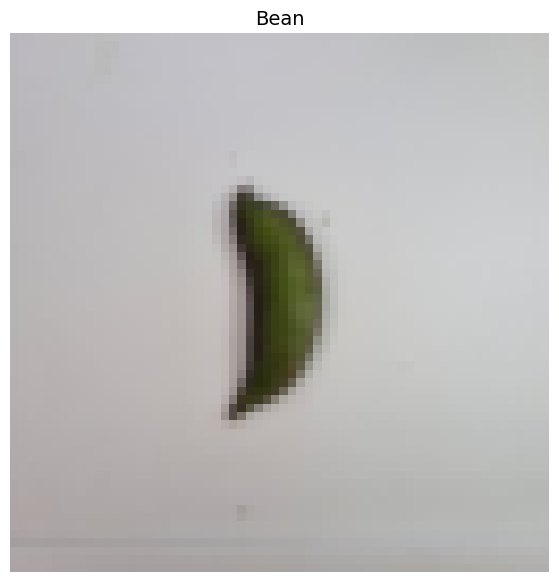

In [16]:
# First training example as image
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [17]:
# Visualise first testing example as tensor
img, label = test_data[0][0], test_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.2627, 0.1686, 0.2157,  ..., 0.1020, 0.0627, 0.0706],
         [0.1529, 0.2275, 0.2118,  ..., 0.0784, 0.0824, 0.0784],
         [0.1608, 0.1843, 0.1686,  ..., 0.1059, 0.0784, 0.0784],
         ...,
         [0.2235, 0.2157, 0.1804,  ..., 0.2471, 0.2627, 0.4471],
         [0.3451, 0.2078, 0.1882,  ..., 0.3686, 0.4902, 0.5804],
         [0.4275, 0.2627, 0.1843,  ..., 0.5098, 0.5961, 0.5608]],

        [[0.2235, 0.1255, 0.1765,  ..., 0.0824, 0.0706, 0.0745],
         [0.1529, 0.1922, 0.1529,  ..., 0.0745, 0.0824, 0.0824],
         [0.1373, 0.1882, 0.1882,  ..., 0.1451, 0.0784, 0.0784],
         ...,
         [0.2157, 0.2157, 0.1882,  ..., 0.2314, 0.2471, 0.4196],
         [0.3294, 0.2078, 0.1961,  ..., 0.3529, 0.4706, 0.5451],
         [0.4039, 0.2549, 0.1843,  ..., 0.4863, 0.5765, 0.5333]],

        [[0.2000, 0.0902, 0.1294,  ..., 0.0627, 0.0471, 0.0588],
         [0.1020, 0.1451, 0.1098,  ..., 0.0667, 0.0627, 0.0784],
         [0.1216, 0.1490, 0.1216,  ..., 0.10

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


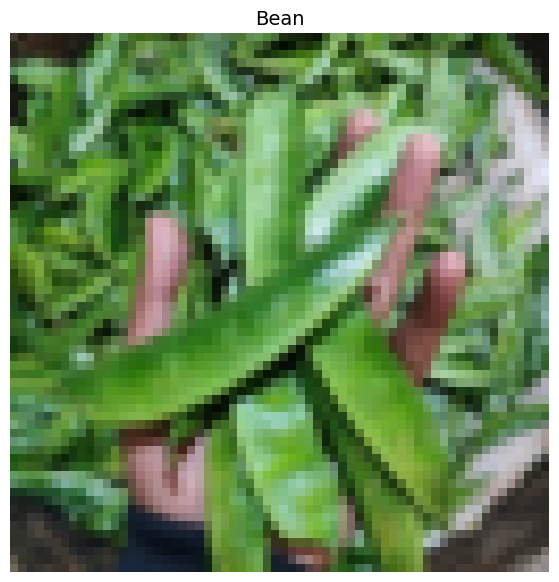

In [18]:
# First testing example as image
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [19]:
# Turn train and test datasets into dataloaders
from torch.utils.data import DataLoader
import os

num_cpus = os.cpu_count()
print(f'Number of CPUs available: {num_cpus}')

train_dataloader = DataLoader(dataset=train_data, batch_size=32, num_workers=num_cpus, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=32, num_workers=num_cpus, shuffle=False)

print(f'There are {len(train_dataloader)} batches in training dataloader')
print(f'There are {len(test_dataloader)} batches in testing dataloader')

Number of CPUs available: 2
There are 469 batches in training dataloader
There are 94 batches in testing dataloader


In [20]:
# Test out dataloader
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


### Simple image classifier with only linear elements

In [ ]:
# Simple neural network with flatten and linear elements

from torch import nn

class VegNN_V1(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*64*3, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=len(class_names))
        )

    def forward(self, x):
        return self.layer_stack(x)

veg_1 = VegNN_V1(hidden_units=10).to(device)
veg_1

VegNN_V1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=15, bias=True)
  )
)

In [ ]:
# Setup loss and acc function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=veg_1.parameters(), lr=0.0001)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [21]:
def train_step(model, dataloader, loss_fn, optimizer, acc_fn):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_logits = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_logits, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
        train_acc += acc_fn(y_preds, y)

        if batch % 100 == 0 and batch != 0:
          print(f'Train batch: {batch} | Loss: {train_loss/batch:.3f} | Acc: {train_acc/batch:.3f}')

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return round(train_loss,3), round(train_acc,3)

In [22]:
def test_step(model, dataloader, loss_fn, acc_fn):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            b = batch
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(y_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            test_acc += acc_fn(y_preds, y)

            if batch % 50 == 0 and batch != 0:
              print(f'Test batch: {batch} | Loss: {test_loss/batch:.3f} | Acc: {test_acc/batch:.3f}')

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return round(test_loss,3), round(test_acc,3)

In [23]:
from tqdm import tqdm

def train_test_loop(model, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, epochs):

    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, acc_fn)
        test_loss, test_acc = test_step(model, test_dataloader, loss_fn, acc_fn)
        print(f'Epoch: {epoch} | Train loss: {train_loss} | Train acc: {train_acc} | Test loss: {test_loss} | Test acc: {test_acc}')

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Trial loop for 10 epoch
veg_1_results = train_test_loop(veg_1, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

Train batch: 100 | Loss: 2.577 | Acc: 15.594
Train batch: 200 | Loss: 2.477 | Acc: 18.812
Train batch: 300 | Loss: 2.402 | Acc: 21.990
Train batch: 400 | Loss: 2.340 | Acc: 24.305
Test batch: 50 | Loss: 2.221 | Acc: 28.875


 10%|█         | 1/10 [01:04<09:38, 64.31s/it]

Epoch: 0 | Train loss: 2.298 | Train acc: 25.615 | Test loss: 2.115 | Test acc: 30.722
Train batch: 100 | Loss: 2.044 | Acc: 35.281
Train batch: 200 | Loss: 2.007 | Acc: 36.422
Train batch: 300 | Loss: 1.984 | Acc: 37.469
Train batch: 400 | Loss: 1.967 | Acc: 37.930
Test batch: 50 | Loss: 1.918 | Acc: 39.812


 20%|██        | 2/10 [02:08<08:35, 64.47s/it]

Epoch: 1 | Train loss: 1.945 | Train acc: 38.475 | Test loss: 1.848 | Test acc: 40.955
Train batch: 100 | Loss: 1.856 | Acc: 42.500
Train batch: 200 | Loss: 1.817 | Acc: 43.438
Train batch: 300 | Loss: 1.800 | Acc: 43.833
Train batch: 400 | Loss: 1.797 | Acc: 43.742
Test batch: 50 | Loss: 1.824 | Acc: 44.125


 30%|███       | 3/10 [03:10<07:21, 63.11s/it]

Epoch: 2 | Train loss: 1.786 | Train acc: 44.003 | Test loss: 1.738 | Test acc: 44.772
Train batch: 100 | Loss: 1.714 | Acc: 47.469
Train batch: 200 | Loss: 1.692 | Acc: 47.844
Train batch: 300 | Loss: 1.701 | Acc: 47.469
Train batch: 400 | Loss: 1.696 | Acc: 47.500
Test batch: 50 | Loss: 1.710 | Acc: 46.812


 40%|████      | 4/10 [04:11<06:13, 62.30s/it]

Epoch: 3 | Train loss: 1.69 | Train acc: 47.241 | Test loss: 1.688 | Test acc: 45.182
Train batch: 100 | Loss: 1.649 | Acc: 49.562
Train batch: 200 | Loss: 1.643 | Acc: 49.016
Train batch: 300 | Loss: 1.635 | Acc: 49.177
Train batch: 400 | Loss: 1.632 | Acc: 49.430
Test batch: 50 | Loss: 1.680 | Acc: 48.688


 50%|█████     | 5/10 [05:10<05:05, 61.07s/it]

Epoch: 4 | Train loss: 1.624 | Train acc: 49.547 | Test loss: 1.629 | Test acc: 48.174
Train batch: 100 | Loss: 1.615 | Acc: 50.875
Train batch: 200 | Loss: 1.600 | Acc: 50.609
Train batch: 300 | Loss: 1.576 | Acc: 51.667
Train batch: 400 | Loss: 1.577 | Acc: 51.523
Test batch: 50 | Loss: 1.630 | Acc: 48.312


 60%|██████    | 6/10 [06:08<04:00, 60.06s/it]

Epoch: 5 | Train loss: 1.569 | Train acc: 51.315 | Test loss: 1.585 | Test acc: 48.182
Train batch: 100 | Loss: 1.570 | Acc: 52.688
Train batch: 200 | Loss: 1.536 | Acc: 52.672
Train batch: 300 | Loss: 1.534 | Acc: 52.719
Train batch: 400 | Loss: 1.538 | Acc: 52.625
Test batch: 50 | Loss: 1.642 | Acc: 48.250


 70%|███████   | 7/10 [07:07<02:58, 59.66s/it]

Epoch: 6 | Train loss: 1.528 | Train acc: 52.785 | Test loss: 1.57 | Test acc: 49.399
Train batch: 100 | Loss: 1.519 | Acc: 54.531
Train batch: 200 | Loss: 1.507 | Acc: 53.922
Train batch: 300 | Loss: 1.504 | Acc: 53.583
Train batch: 400 | Loss: 1.494 | Acc: 53.719
Test batch: 50 | Loss: 1.591 | Acc: 50.938


 80%|████████  | 8/10 [08:10<02:01, 60.83s/it]

Epoch: 7 | Train loss: 1.492 | Train acc: 53.432 | Test loss: 1.537 | Test acc: 51.226
Train batch: 100 | Loss: 1.486 | Acc: 54.844
Train batch: 200 | Loss: 1.475 | Acc: 54.578
Train batch: 300 | Loss: 1.477 | Acc: 54.531
Train batch: 400 | Loss: 1.470 | Acc: 54.859
Test batch: 50 | Loss: 1.663 | Acc: 50.312


 90%|█████████ | 9/10 [09:17<01:02, 62.59s/it]

Epoch: 8 | Train loss: 1.463 | Train acc: 54.691 | Test loss: 1.594 | Test acc: 49.05
Train batch: 100 | Loss: 1.445 | Acc: 56.688
Train batch: 200 | Loss: 1.456 | Acc: 56.109
Train batch: 300 | Loss: 1.444 | Acc: 55.938
Train batch: 400 | Loss: 1.441 | Acc: 56.055
Test batch: 50 | Loss: 1.541 | Acc: 54.188


100%|██████████| 10/10 [10:21<00:00, 62.19s/it]

Epoch: 9 | Train loss: 1.435 | Train acc: 56.023 | Test loss: 1.488 | Test acc: 53.494


In [32]:
def plot_loss_curves(results):
    train_loss = results['train_loss']
    test_loss = results['test_loss']
    train_acc = results['train_acc']
    test_acc = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='train_accuracy')
    plt.plot(epochs, test_acc, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [ ]:
plot_loss_curves(veg_1_results)

Not too good accuracy, maybe model too simple

### Convolutional neural network to classify images

In [ ]:
# TinyVGG architecture from https://poloclub.github.io/cnn-explainer/

class VegNN_V2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*16*16, out_features=len(class_names))
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

veg_2 = VegNN_V2().to(device)
veg_2

VegNN_V2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=15, bias=True)
  )
)

In [ ]:
# Setup loss and acc function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=veg_2.parameters(), lr=0.001)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [ ]:
# Trial loop for 10 epoch
veg_2_results = train_test_loop(veg_2, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

Train batch: 100 | Loss: 2.643 | Acc: 13.281
Train batch: 200 | Loss: 2.299 | Acc: 25.750
Train batch: 300 | Loss: 2.013 | Acc: 35.312
Train batch: 400 | Loss: 1.808 | Acc: 42.109
Test batch: 50 | Loss: 1.172 | Acc: 62.500


 10%|█         | 1/10 [01:06<09:54, 66.07s/it]

Epoch: 0 | Train loss: 1.695 | Train acc: 45.629 | Test loss: 1.075 | Test acc: 64.784
Train batch: 100 | Loss: 0.998 | Acc: 71.156
Train batch: 200 | Loss: 0.929 | Acc: 72.328
Train batch: 300 | Loss: 0.891 | Acc: 73.167
Train batch: 400 | Loss: 0.854 | Acc: 74.164
Test batch: 50 | Loss: 0.859 | Acc: 72.625


 20%|██        | 2/10 [02:09<08:34, 64.33s/it]

Epoch: 1 | Train loss: 0.842 | Train acc: 74.08 | Test loss: 0.826 | Test acc: 73.372
Train batch: 100 | Loss: 0.679 | Acc: 80.250
Train batch: 200 | Loss: 0.671 | Acc: 80.188
Train batch: 300 | Loss: 0.653 | Acc: 80.198
Train batch: 400 | Loss: 0.631 | Acc: 80.727
Test batch: 50 | Loss: 0.852 | Acc: 75.312


 30%|███       | 3/10 [03:10<07:20, 62.96s/it]

Epoch: 2 | Train loss: 0.626 | Train acc: 80.688 | Test loss: 0.7 | Test acc: 78.618
Train batch: 100 | Loss: 0.539 | Acc: 84.781
Train batch: 200 | Loss: 0.510 | Acc: 85.281
Train batch: 300 | Loss: 0.503 | Acc: 85.323
Train batch: 400 | Loss: 0.500 | Acc: 85.438
Test batch: 50 | Loss: 0.471 | Acc: 86.000


 40%|████      | 4/10 [04:10<06:10, 61.68s/it]

Epoch: 3 | Train loss: 0.501 | Train acc: 85.059 | Test loss: 0.525 | Test acc: 83.139
Train batch: 100 | Loss: 0.416 | Acc: 87.719
Train batch: 200 | Loss: 0.413 | Acc: 87.469
Train batch: 300 | Loss: 0.410 | Acc: 87.990
Train batch: 400 | Loss: 0.401 | Acc: 88.219
Test batch: 50 | Loss: 0.528 | Acc: 85.000


 50%|█████     | 5/10 [05:12<05:09, 61.90s/it]

Epoch: 4 | Train loss: 0.407 | Train acc: 87.807 | Test loss: 0.491 | Test acc: 85.093
Train batch: 100 | Loss: 0.291 | Acc: 92.344
Train batch: 200 | Loss: 0.325 | Acc: 90.750
Train batch: 300 | Loss: 0.328 | Acc: 90.406
Train batch: 400 | Loss: 0.330 | Acc: 90.133
Test batch: 50 | Loss: 0.623 | Acc: 81.562


 60%|██████    | 6/10 [06:13<04:06, 61.54s/it]

Epoch: 5 | Train loss: 0.336 | Train acc: 89.843 | Test loss: 0.568 | Test acc: 82.707
Train batch: 100 | Loss: 0.280 | Acc: 91.844
Train batch: 200 | Loss: 0.280 | Acc: 91.734
Train batch: 300 | Loss: 0.284 | Acc: 91.573
Train batch: 400 | Loss: 0.284 | Acc: 91.438
Test batch: 50 | Loss: 0.402 | Acc: 89.562


 70%|███████   | 7/10 [07:15<03:04, 61.65s/it]

Epoch: 6 | Train loss: 0.281 | Train acc: 91.282 | Test loss: 0.422 | Test acc: 87.241
Train batch: 100 | Loss: 0.214 | Acc: 94.594
Train batch: 200 | Loss: 0.238 | Acc: 93.531
Train batch: 300 | Loss: 0.236 | Acc: 93.146
Train batch: 400 | Loss: 0.249 | Acc: 92.703
Test batch: 50 | Loss: 0.455 | Acc: 88.375


 80%|████████  | 8/10 [08:16<02:03, 61.63s/it]

Epoch: 7 | Train loss: 0.25 | Train acc: 92.468 | Test loss: 0.454 | Test acc: 86.537
Train batch: 100 | Loss: 0.205 | Acc: 94.812
Train batch: 200 | Loss: 0.224 | Acc: 93.594
Train batch: 300 | Loss: 0.216 | Acc: 93.615
Train batch: 400 | Loss: 0.213 | Acc: 93.648
Test batch: 50 | Loss: 0.486 | Acc: 87.188


 90%|█████████ | 9/10 [09:16<01:01, 61.14s/it]

Epoch: 8 | Train loss: 0.214 | Train acc: 93.352 | Test loss: 0.424 | Test acc: 87.54
Train batch: 100 | Loss: 0.192 | Acc: 94.688
Train batch: 200 | Loss: 0.182 | Acc: 94.766
Train batch: 300 | Loss: 0.180 | Acc: 94.594
Train batch: 400 | Loss: 0.189 | Acc: 94.227
Test batch: 50 | Loss: 0.411 | Acc: 89.938


100%|██████████| 10/10 [10:18<00:00, 61.84s/it]

Epoch: 9 | Train loss: 0.193 | Train acc: 93.868 | Test loss: 0.419 | Test acc: 88.418


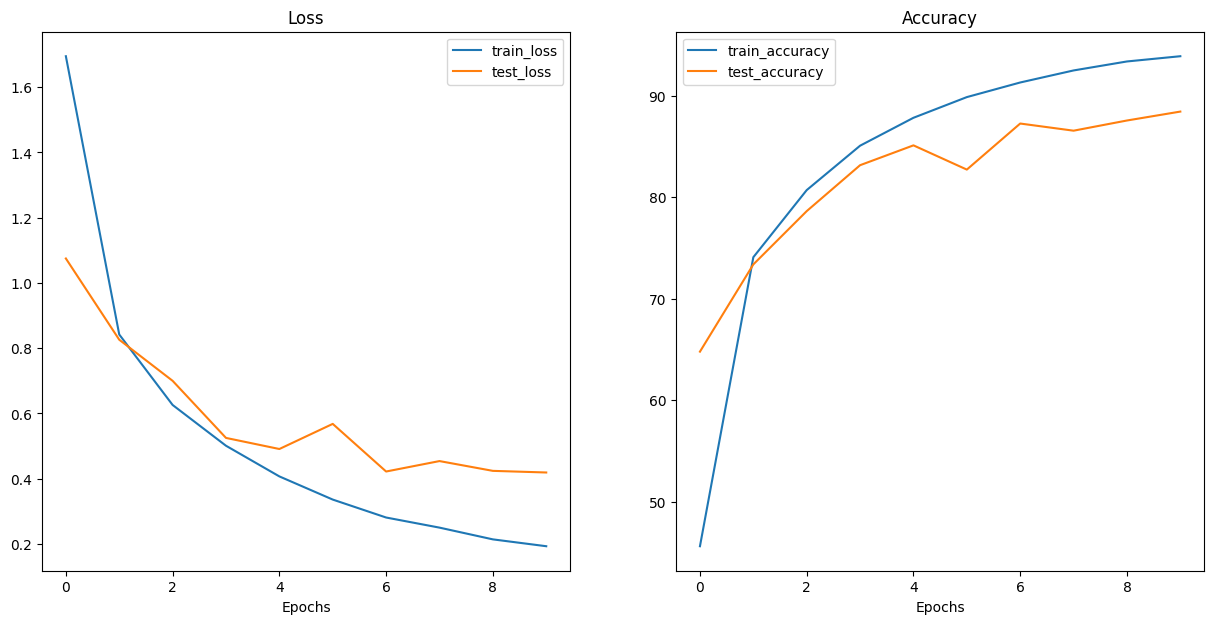

In [ ]:
plot_loss_curves(veg_2_results)

High accuracy with CNN, possibly slight case of overfitting

### Complex CNN to classify images

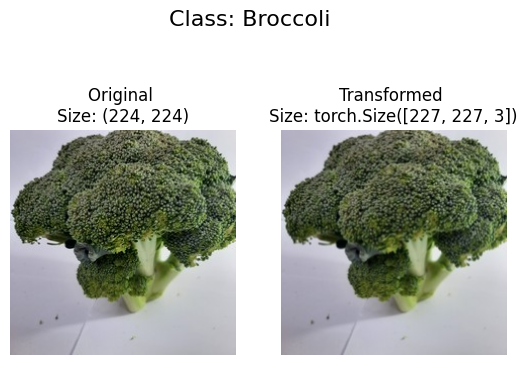

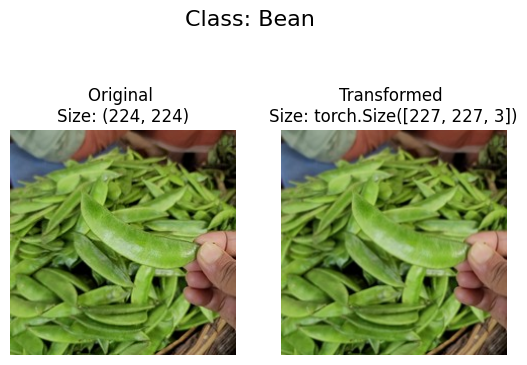

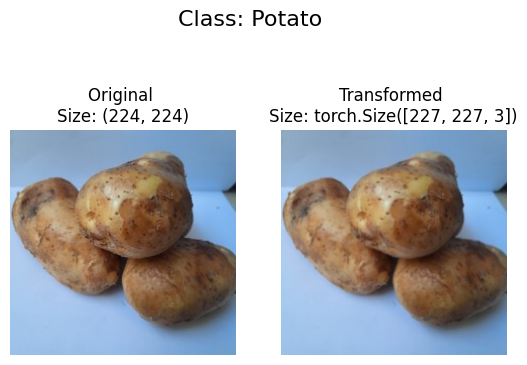

In [24]:
# Create transform for AlexNet
data_transform = transforms.Compose([transforms.Resize(size=(227,227)), transforms.ToTensor()])

# Test out transform by plotting original and transformed images
def plot_transformed_images(image_paths, transform, n):
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(all_image_paths, data_transform, 3)

In [25]:
# Use ImageFolder to create datasets

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)

test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 15000
    Root location: /content/drive/MyDrive/data/Vegetables/Vegetable Images/train
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2999
    Root location: /content/drive/MyDrive/data/Vegetables/Vegetable Images/test
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [26]:
# Turn train and test datasets into dataloaders

num_cpus = os.cpu_count()
print(f'Number of CPUs available: {num_cpus}')

train_dataloader = DataLoader(dataset=train_data, batch_size=32, num_workers=num_cpus, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=32, num_workers=num_cpus, shuffle=False)

print(f'There are {len(train_dataloader)} batches in training dataloader')
print(f'There are {len(test_dataloader)} batches in testing dataloader')

Number of CPUs available: 2
There are 469 batches in training dataloader
There are 94 batches in testing dataloader


In [27]:
# AlexNet architecture from https://blog.paperspace.com/alexnet-pytorch/

class VegNN_V3(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

veg_3 = VegNN_V3(num_classes=len(class_names)).to(device)
veg_3

VegNN_V3(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
 

In [28]:
# Test a forward pass execution
import random

random_ind = random.choice(range(len(train_data)))
rand_X, rand_y = train_data[random_ind]
print(f'Shape of tensor: {rand_X.shape}')

rand_logits = veg_3(rand_X.unsqueeze(dim=0).to(device))
rand_preds = torch.argmax(torch.softmax(rand_logits, dim=1), dim=1).item()
print(f'Actual label: {class_names[rand_y]} | Predicted label: {class_names[rand_preds]}')

Shape of tensor: torch.Size([3, 227, 227])
Actual label: Bitter_Gourd | Predicted label: Cucumber


In [29]:
# Setup loss and acc function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=veg_3.parameters(), lr=0.0001)
def acc_fn(y_preds, y_trues):
  tf = (y_preds == y_trues)
  return tf.sum().item() / len(y_preds) * 100

In [30]:
# Trial loop for 10 epoch
veg_3_results = train_test_loop(veg_3, train_dataloader, test_dataloader, loss_fn, optimizer, acc_fn, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

Train batch: 100 | Loss: 1.707 | Acc: 44.094
Train batch: 200 | Loss: 1.273 | Acc: 57.641
Train batch: 300 | Loss: 1.058 | Acc: 64.906
Train batch: 400 | Loss: 0.915 | Acc: 69.844
Test batch: 50 | Loss: 0.631 | Acc: 82.062


 10%|█         | 1/10 [01:40<15:00, 100.04s/it]

Epoch: 0 | Train loss: 0.845 | Train acc: 72.022 | Test loss: 0.552 | Test acc: 82.6
Train batch: 100 | Loss: 0.328 | Acc: 90.906
Train batch: 200 | Loss: 0.321 | Acc: 90.297
Train batch: 300 | Loss: 0.286 | Acc: 91.271
Train batch: 400 | Loss: 0.281 | Acc: 91.305
Test batch: 50 | Loss: 0.315 | Acc: 92.188


 20%|██        | 2/10 [03:12<12:46, 95.81s/it] 

Epoch: 1 | Train loss: 0.272 | Train acc: 91.427 | Test loss: 0.314 | Test acc: 90.047
Train batch: 100 | Loss: 0.195 | Acc: 95.031
Train batch: 200 | Loss: 0.194 | Acc: 94.391
Train batch: 300 | Loss: 0.193 | Acc: 94.385
Train batch: 400 | Loss: 0.202 | Acc: 94.094
Test batch: 50 | Loss: 0.082 | Acc: 99.625


 30%|███       | 3/10 [04:47<11:05, 95.10s/it]

Epoch: 2 | Train loss: 0.196 | Train acc: 94.001 | Test loss: 0.087 | Test acc: 97.507
Train batch: 100 | Loss: 0.134 | Acc: 96.844
Train batch: 200 | Loss: 0.133 | Acc: 96.391
Train batch: 300 | Loss: 0.132 | Acc: 96.240
Train batch: 400 | Loss: 0.129 | Acc: 96.289
Test batch: 50 | Loss: 0.188 | Acc: 96.875


 40%|████      | 4/10 [06:20<09:27, 94.50s/it]

Epoch: 3 | Train loss: 0.126 | Train acc: 96.144 | Test loss: 0.306 | Test acc: 91.943
Train batch: 100 | Loss: 0.139 | Acc: 96.750
Train batch: 200 | Loss: 0.114 | Acc: 97.109
Train batch: 300 | Loss: 0.126 | Acc: 96.604
Train batch: 400 | Loss: 0.120 | Acc: 96.727
Test batch: 50 | Loss: 0.342 | Acc: 92.938


 50%|█████     | 5/10 [07:56<07:54, 94.95s/it]

Epoch: 4 | Train loss: 0.117 | Train acc: 96.557 | Test loss: 0.373 | Test acc: 89.934
Train batch: 100 | Loss: 0.097 | Acc: 98.250
Train batch: 200 | Loss: 0.102 | Acc: 97.422
Train batch: 300 | Loss: 0.099 | Acc: 97.240
Train batch: 400 | Loss: 0.105 | Acc: 96.922
Test batch: 50 | Loss: 0.176 | Acc: 96.625


 60%|██████    | 6/10 [09:32<06:20, 95.18s/it]

Epoch: 5 | Train loss: 0.104 | Train acc: 96.651 | Test loss: 0.157 | Test acc: 95.113
Train batch: 100 | Loss: 0.084 | Acc: 98.469
Train batch: 200 | Loss: 0.076 | Acc: 98.125
Train batch: 300 | Loss: 0.084 | Acc: 97.698
Train batch: 400 | Loss: 0.089 | Acc: 97.453
Test batch: 50 | Loss: 0.148 | Acc: 97.062


 70%|███████   | 7/10 [11:10<04:48, 96.23s/it]

Epoch: 6 | Train loss: 0.091 | Train acc: 97.126 | Test loss: 0.108 | Test acc: 96.576
Train batch: 100 | Loss: 0.094 | Acc: 98.281
Train batch: 200 | Loss: 0.072 | Acc: 98.312
Train batch: 300 | Loss: 0.073 | Acc: 98.125
Train batch: 400 | Loss: 0.074 | Acc: 98.008
Test batch: 50 | Loss: 0.082 | Acc: 99.625


 80%|████████  | 8/10 [12:45<03:11, 95.87s/it]

Epoch: 7 | Train loss: 0.069 | Train acc: 97.834 | Test loss: 0.059 | Test acc: 98.305
Train batch: 100 | Loss: 0.058 | Acc: 99.250
Train batch: 200 | Loss: 0.084 | Acc: 97.766
Train batch: 300 | Loss: 0.085 | Acc: 97.740
Train batch: 400 | Loss: 0.078 | Acc: 97.867
Test batch: 50 | Loss: 0.147 | Acc: 97.438


 90%|█████████ | 9/10 [14:23<01:36, 96.47s/it]

Epoch: 8 | Train loss: 0.073 | Train acc: 97.795 | Test loss: 0.117 | Test acc: 96.144
Train batch: 100 | Loss: 0.040 | Acc: 99.875
Train batch: 200 | Loss: 0.052 | Acc: 98.891
Train batch: 300 | Loss: 0.064 | Acc: 98.375
Train batch: 400 | Loss: 0.066 | Acc: 98.242
Test batch: 50 | Loss: 0.210 | Acc: 96.188


100%|██████████| 10/10 [15:56<00:00, 95.70s/it]

Epoch: 9 | Train loss: 0.064 | Train acc: 98.072 | Test loss: 0.629 | Test acc: 84.676


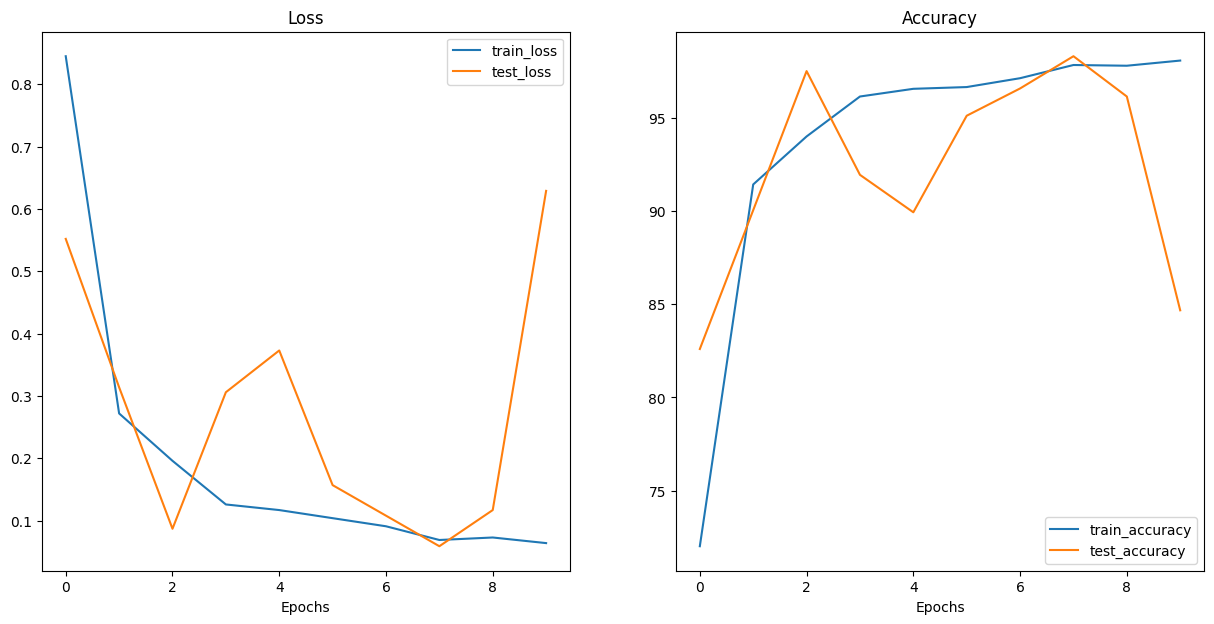

In [33]:
plot_loss_curves(veg_3_results)

High accuracy but overfit at the end